In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Таблица корреляции

In [3]:
from typing import Dict, Tuple, Set, Callable


def grouper(input: Dict[Tuple[str, ...],pd.DataFrame],
            keys: Tuple[str, ...]) -> Dict[Tuple[str, ...], pd.DataFrame]:
    """
    Helper function for recursive grouping dict of pandas DataFrames.
    """
    if not keys:
        return input

    to_tuple_transformer: Callable = lambda element: element if isinstance(element, tuple) else (element, )

    grouped_df: Dict[Tuple[str, ...], pd.DataFrame] = {
        (next_key, *to_tuple_transformer(curr_key)): next_df
        for curr_key, curr_df in input.items()
        for next_key, next_df in curr_df.groupby(keys[-1])
    }

    return grouper(grouped_df, keys[:-1])


def group(input: pd.DataFrame,
          keys: Tuple[str, ...] = ("engine_family", "flight_phase")) -> Dict[Tuple[str, ...], pd.DataFrame]:
    """
    Mock function for maintenance characteristics prediction.
    :param input: input DataFrame of aircraft and engine characteristics.
    :param keys: keys that are used for grouping output data.
    :return: output groups of DataFrames of predicted maintenance characteristics.
    """
    phase_df: Dict = {k: v for k, v in input.groupby(keys[-1])}

    return grouper(phase_df, keys[:-1])

In [4]:
X = pd.read_csv('drive/MyDrive/Colab Notebooks/mm/r&d/X.csv')
y = pd.read_csv('drive/MyDrive/Colab Notebooks/mm/r&d/y.csv')

In [5]:
Xcols = set(X.columns)
ycols = set(y.columns)

In [6]:
merged = pd.merge(X, y, on=["engine_id", "flight_datetime", "flight_phase"])

In [7]:
splitted_datasets = group(merged, ("flight_phase", "engine_family"))

In [8]:
def validate(df):
    return df.dropna(axis='columns', thresh=20).dropna()

1       2022-07-24 02:46:01
7       2022-07-15 18:02:49
19      2022-07-23 02:33:23
20      2022-07-07 07:32:09
31      2022-07-02 21:54:01
                ...        
95571   2022-06-27 15:00:42
95576   2022-07-26 13:50:42
95581   2022-03-08 06:20:19
95585   2022-07-17 10:47:22
95587   2022-03-25 16:14:04
Name: flight_datetime, Length: 18097, dtype: datetime64[ns]
6       2022-06-29 03:54:51
10      2022-06-01 09:04:07
28      2022-04-14 04:03:53
40      2022-02-28 15:09:25
41      2022-04-26 19:06:10
                ...        
95567   2022-04-19 18:39:47
95568   2022-07-06 05:57:48
95572   2022-04-09 23:48:29
95584   2022-01-24 20:33:15
95586   2022-05-25 20:26:48
Name: flight_datetime, Length: 18460, dtype: datetime64[ns]
3       2022-05-25 23:50:56
8       2022-02-27 22:53:26
9       2022-07-19 04:38:31
16      2022-05-13 04:48:28
17      2022-06-27 12:07:47
                ...        
95564   2022-05-24 01:45:46
95565   2022-07-08 12:03:53
95570   2022-07-16 14:57:39
95573   2022

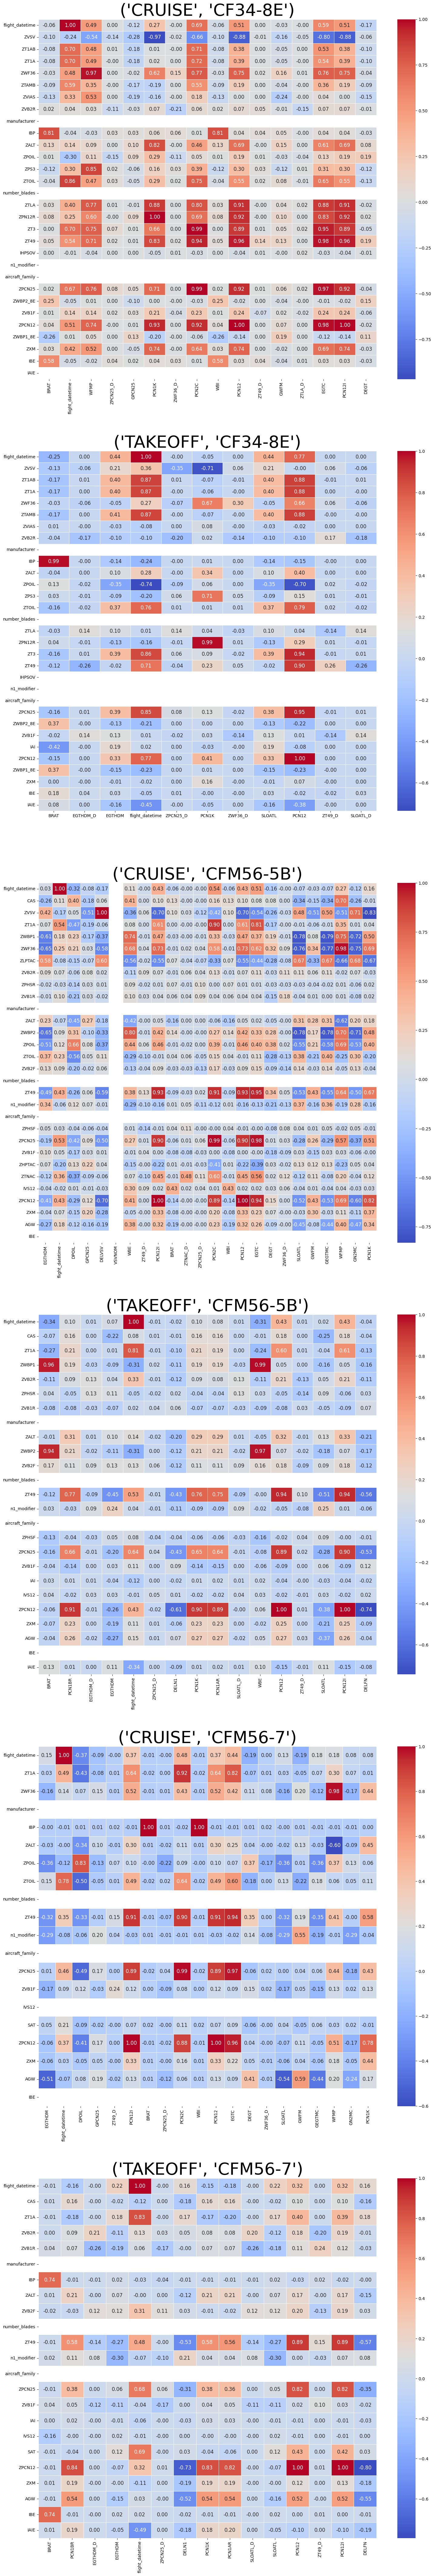

In [20]:
f, ax = plt.subplots(len(splitted_datasets.keys()), 1, figsize=(18, 108))

for i, (key, df) in enumerate(splitted_datasets.items()):
    val_df = validate(df)
    val_df.drop(columns=["engine_id", "aircraft_grp", "flight_phase", "aircraft_id",
                         "engine_position", "ac_manufacturer", "engine_family",
                         "aircraft_type", "engine_type"],
                inplace=True)
    val_df = val_df.astype({'flight_datetime': 'datetime64[ns]'})
    val_df.flight_datetime = pd.to_numeric(val_df.flight_datetime)
    valdfcols = set(val_df.columns)
    valXcols = list(valdfcols.intersection(Xcols))
    valycols = list(valdfcols.intersection(ycols))
    corr = val_df.corr()[valycols]
    corr = pd.DataFrame(corr, index=valXcols)
    sns.heatmap(corr, annot=True, annot_kws={'size': 12}, 
    linewidths=.5, fmt= '.2f', cmap="coolwarm", ax=ax[i])
    ax[i].set_title(str(key), fontsize=40)
plt.show()

# Графики зависимостей

In [ ]:
def plot_graphics(threshold, key):
    val_df = validate(splitted_datasets[key])
    val_df.drop(columns=["engine_id", "flight_datetime", "flight_phase"], inplace=True)

    valdfcols = set(val_df.columns)
    valXcols = list(valdfcols.intersection(Xcols))
    valycols = list(valdfcols.intersection(ycols))

    corr = val_df.corr()[valycols]
    corr = pd.DataFrame(corr, index=valXcols)

    tsdf = corr.rename_axis(index='index', columns='col').stack().loc[lambda x: x >= threshold]

    _, axs = plt.subplots(tsdf.shape[0], 1)
    for i in range(tsdf.shape[0]):
        g = sns.catplot(x=tsdf.index[i][0], y=tsdf.index[i][1], data=val_df, kind='point', ax=axs[i])
        g.fig.set_size_inches(10, 10)

## (CRUISE, CF34-8E)

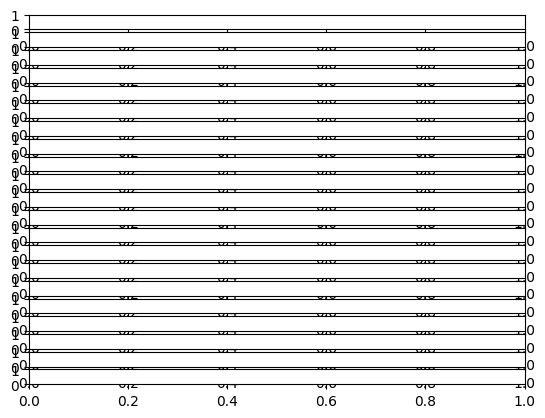

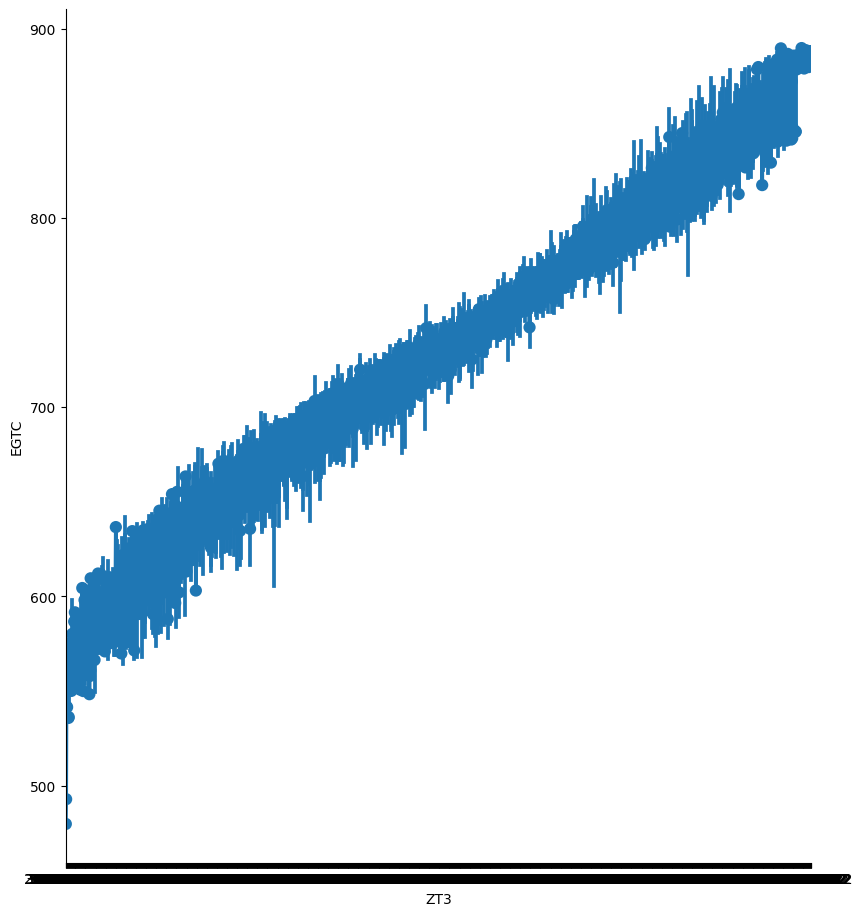

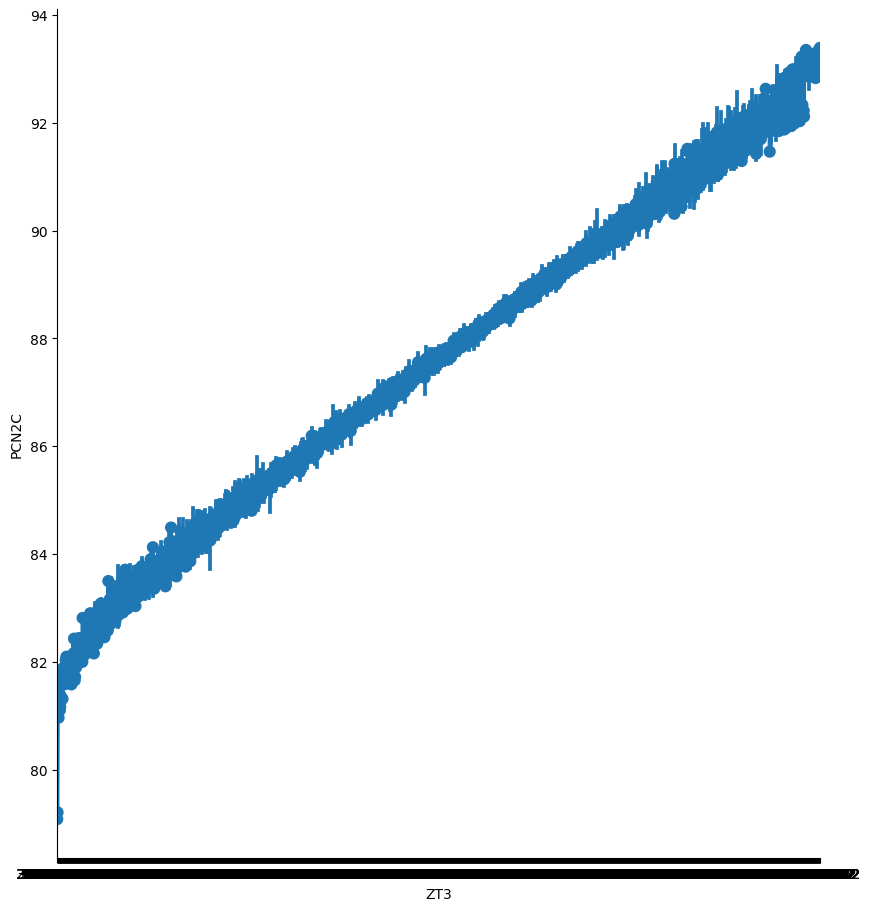

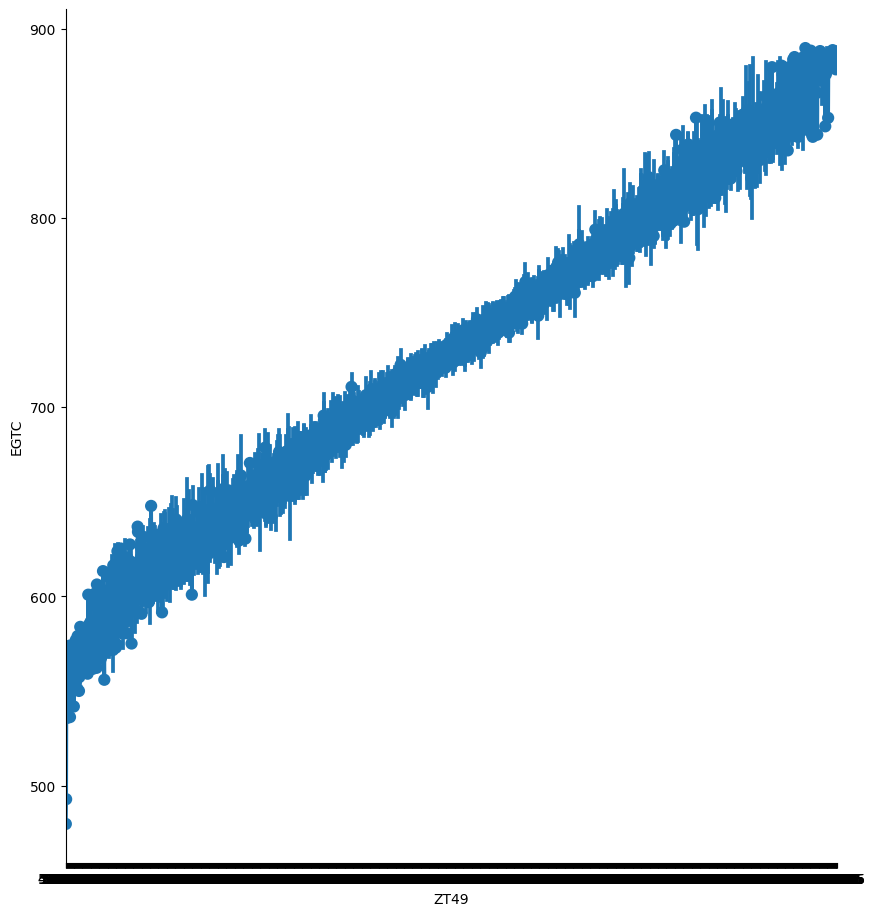

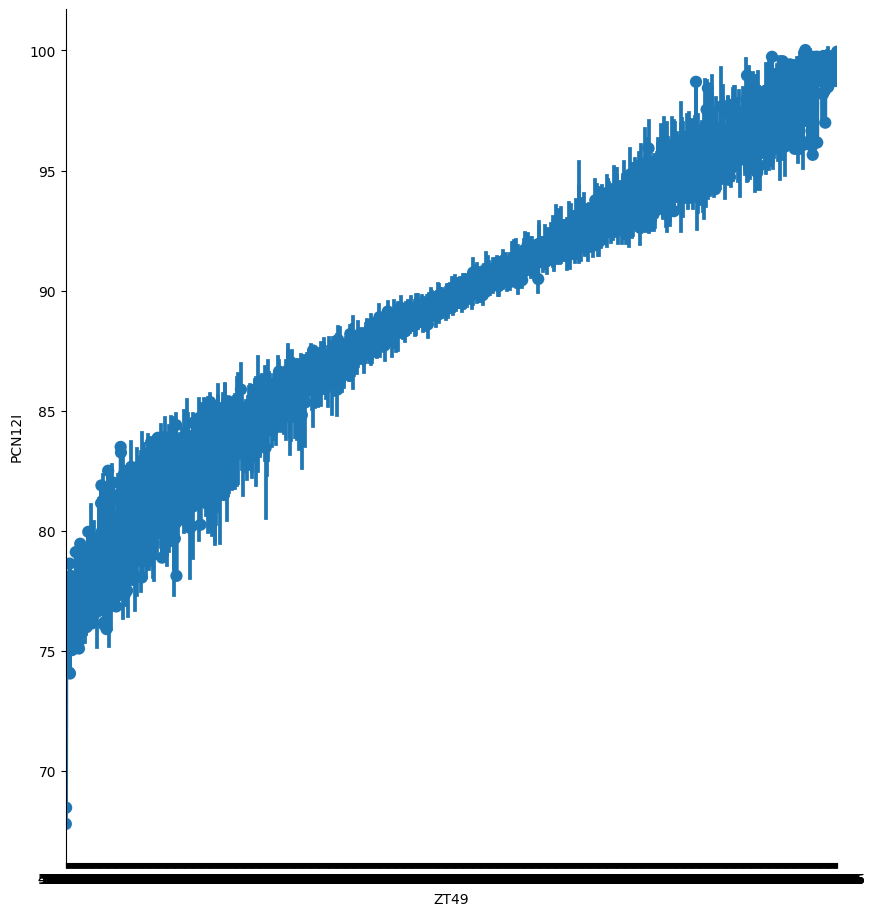

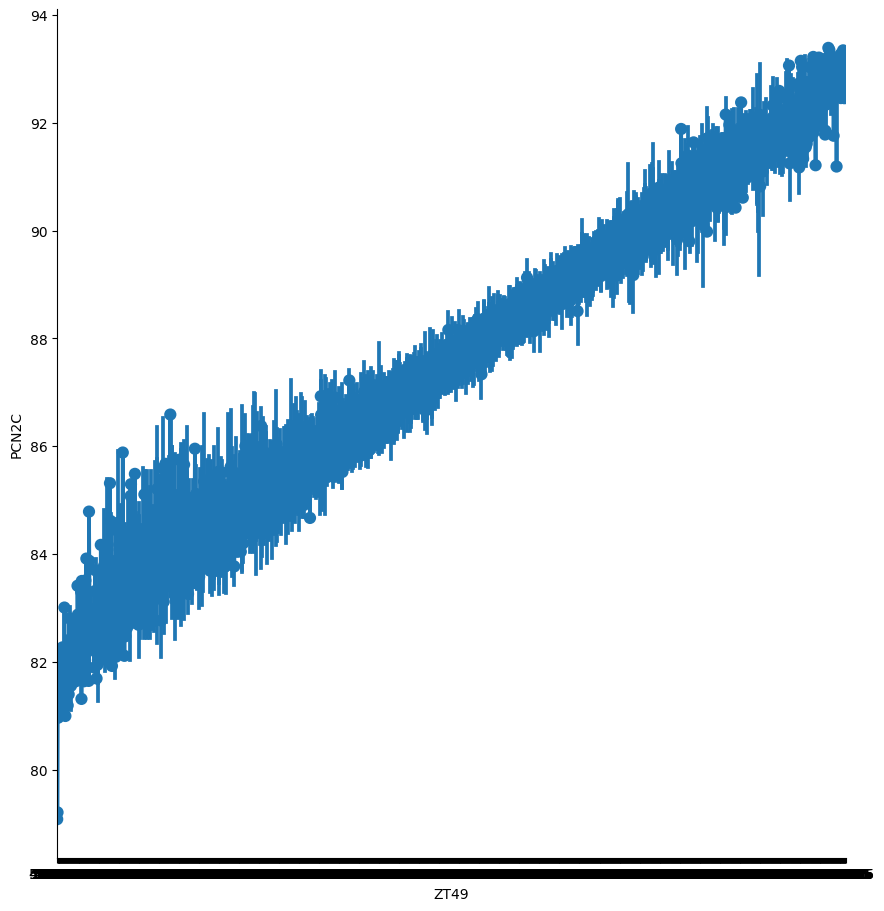

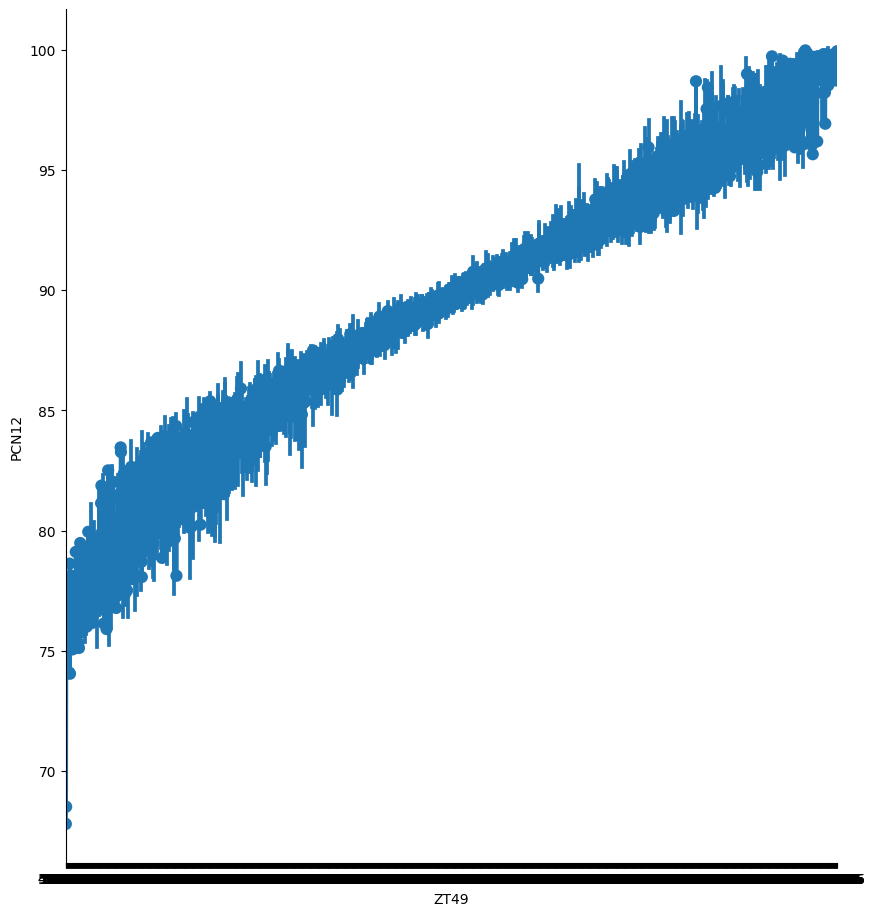

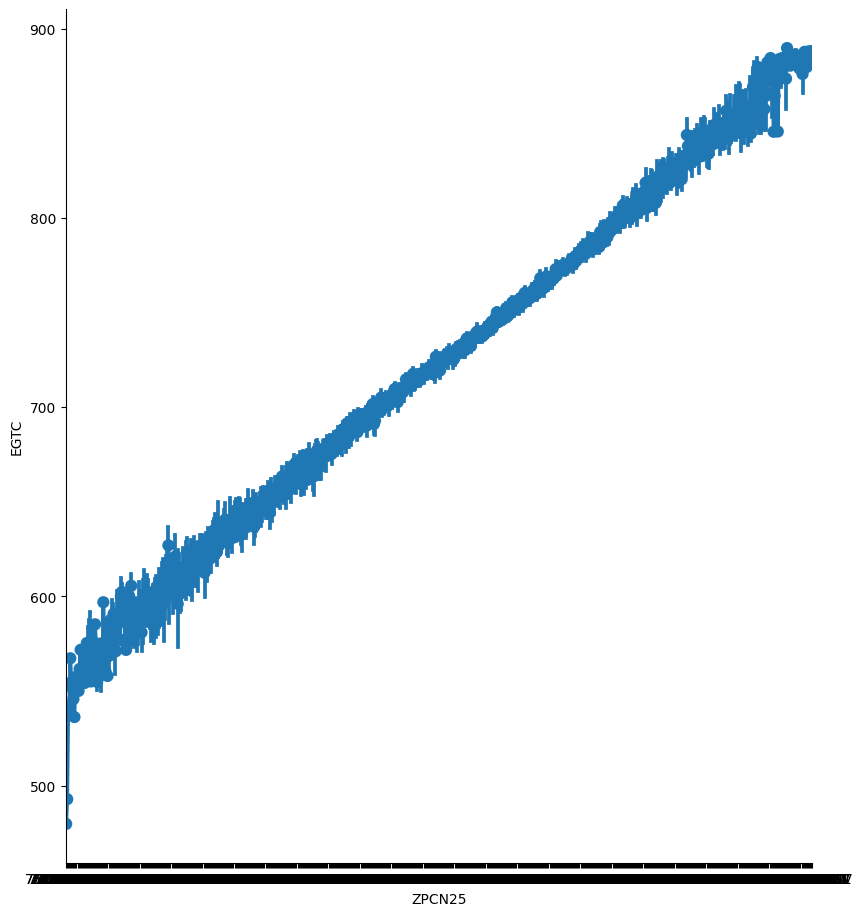

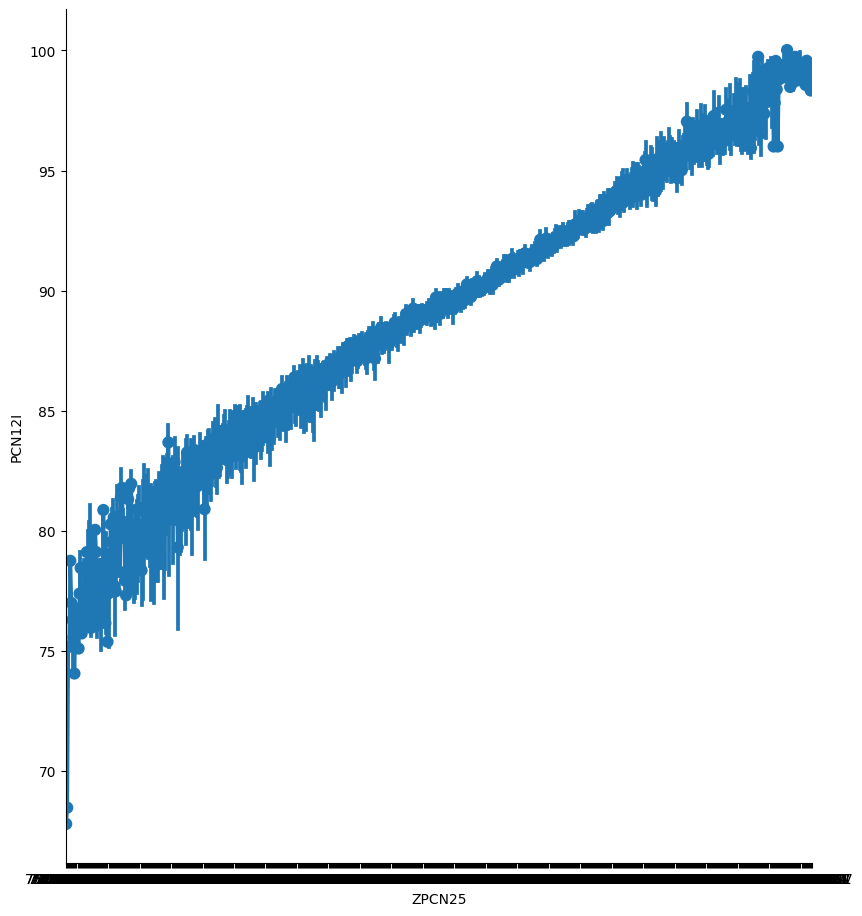

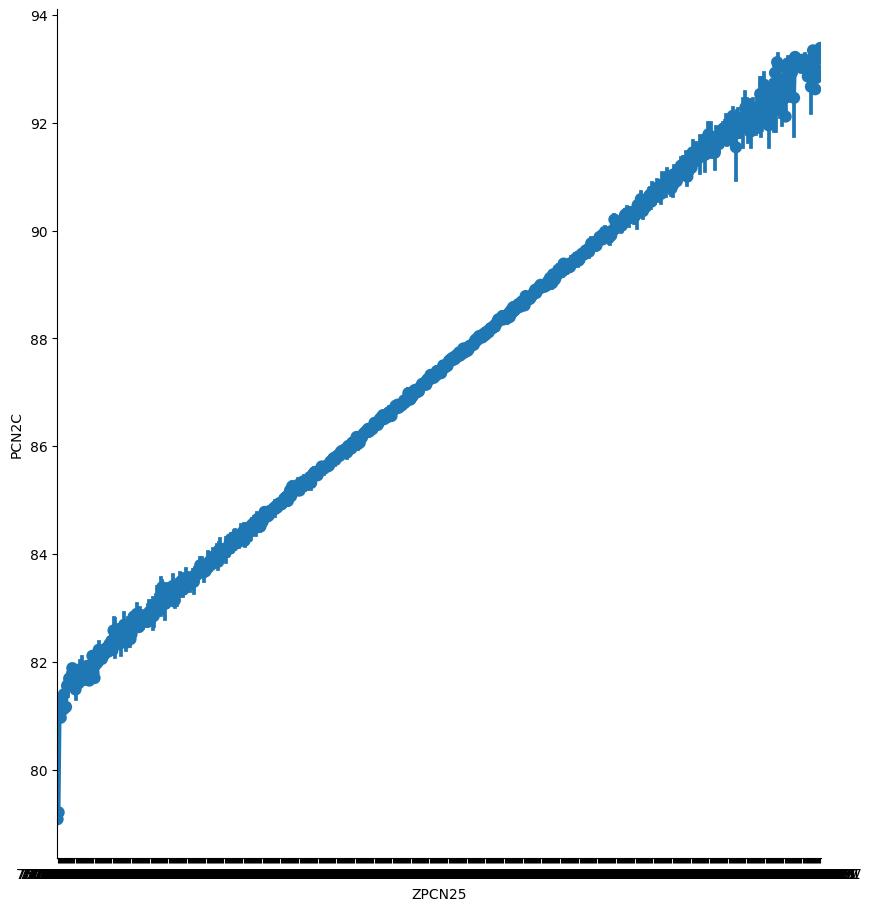

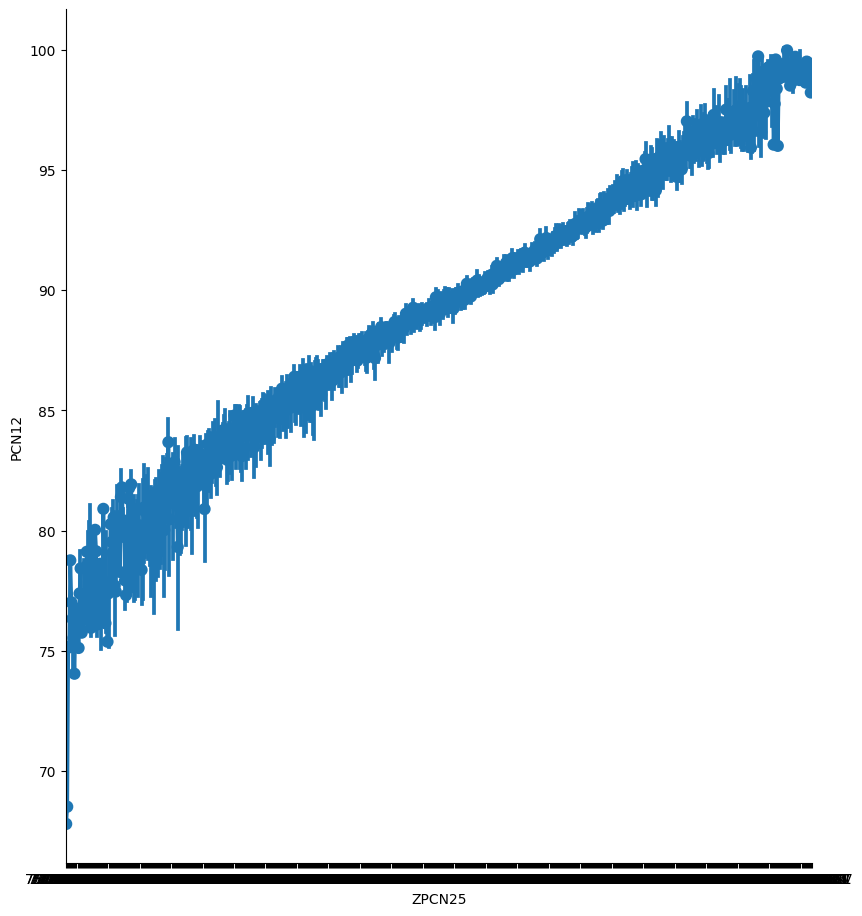

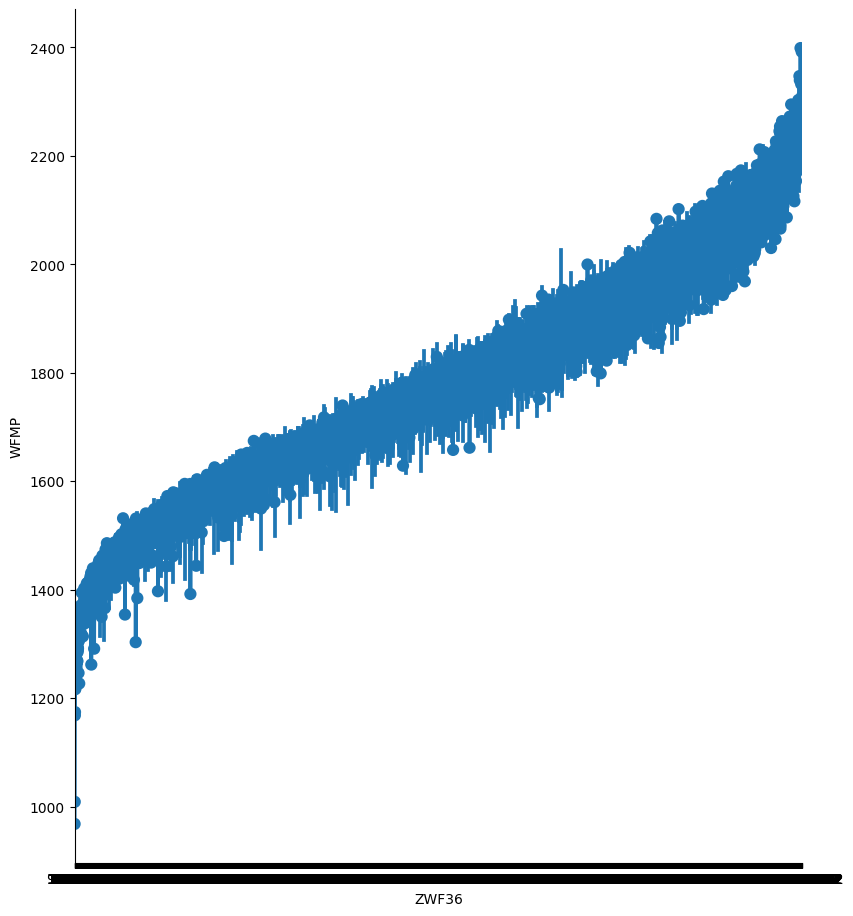

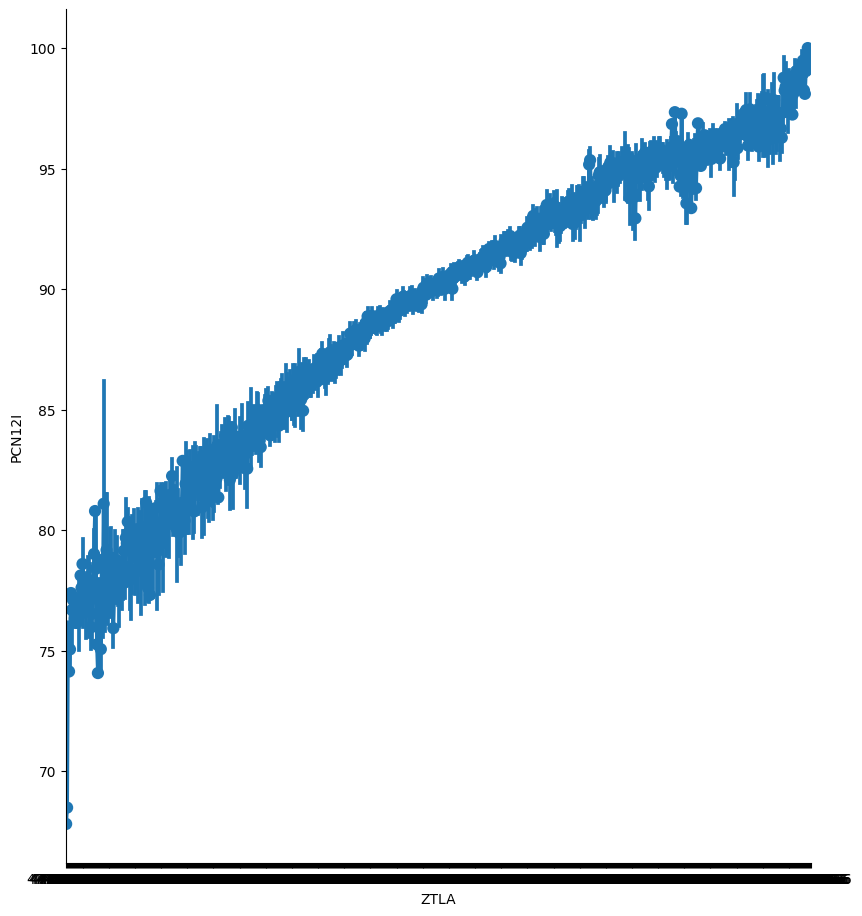

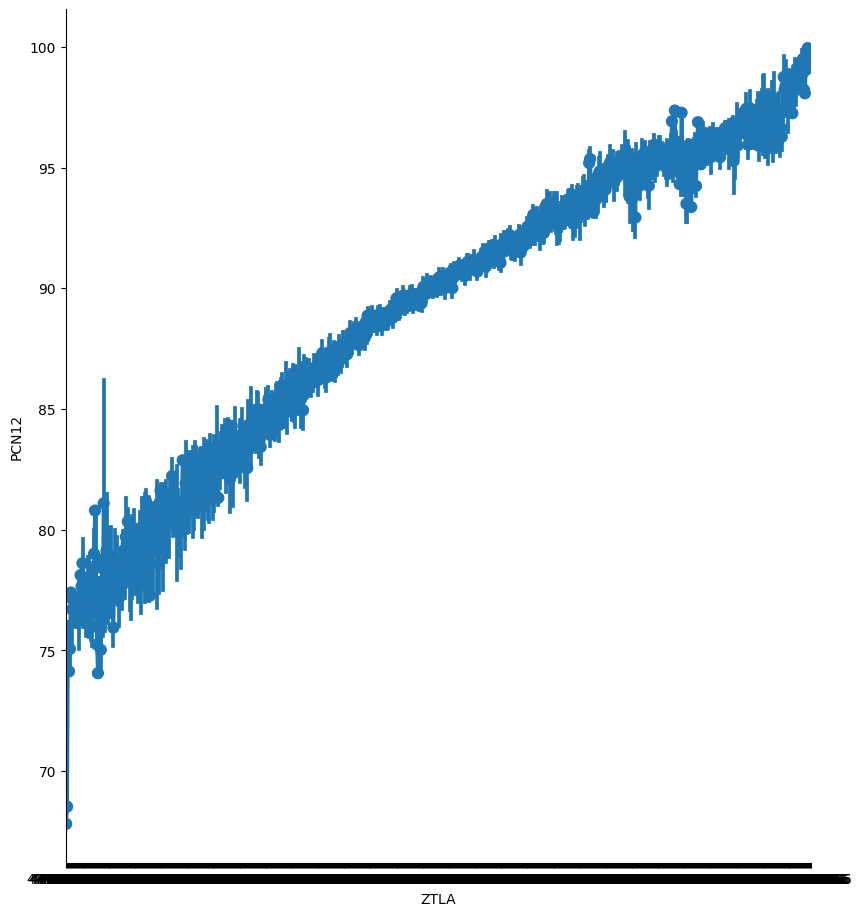

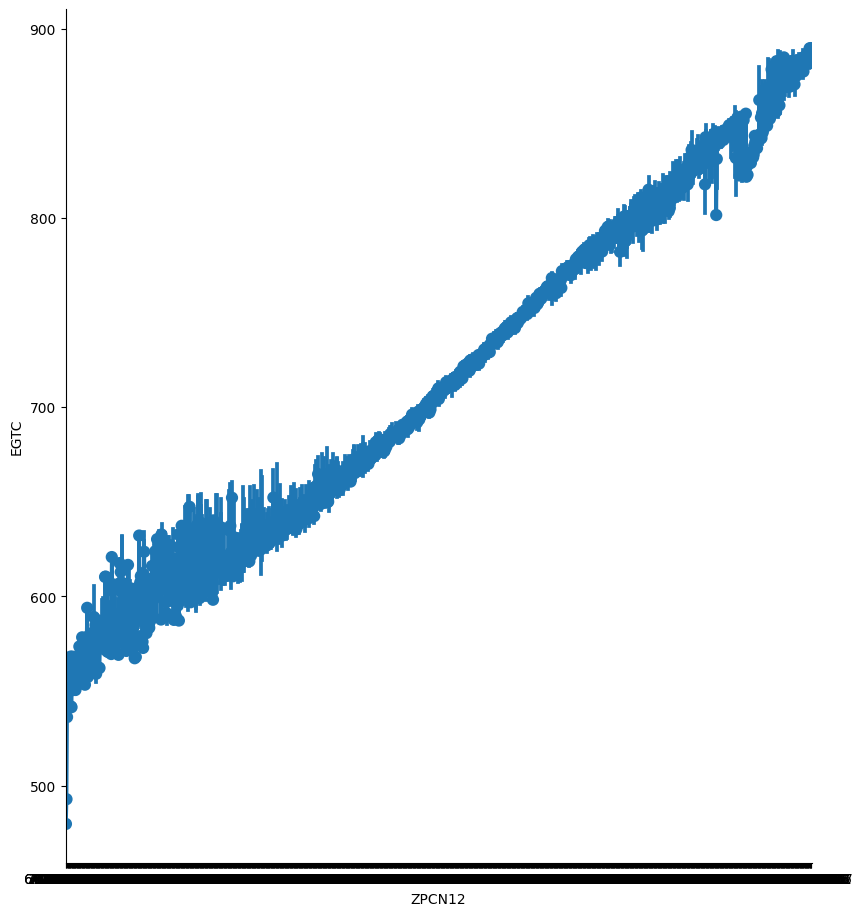

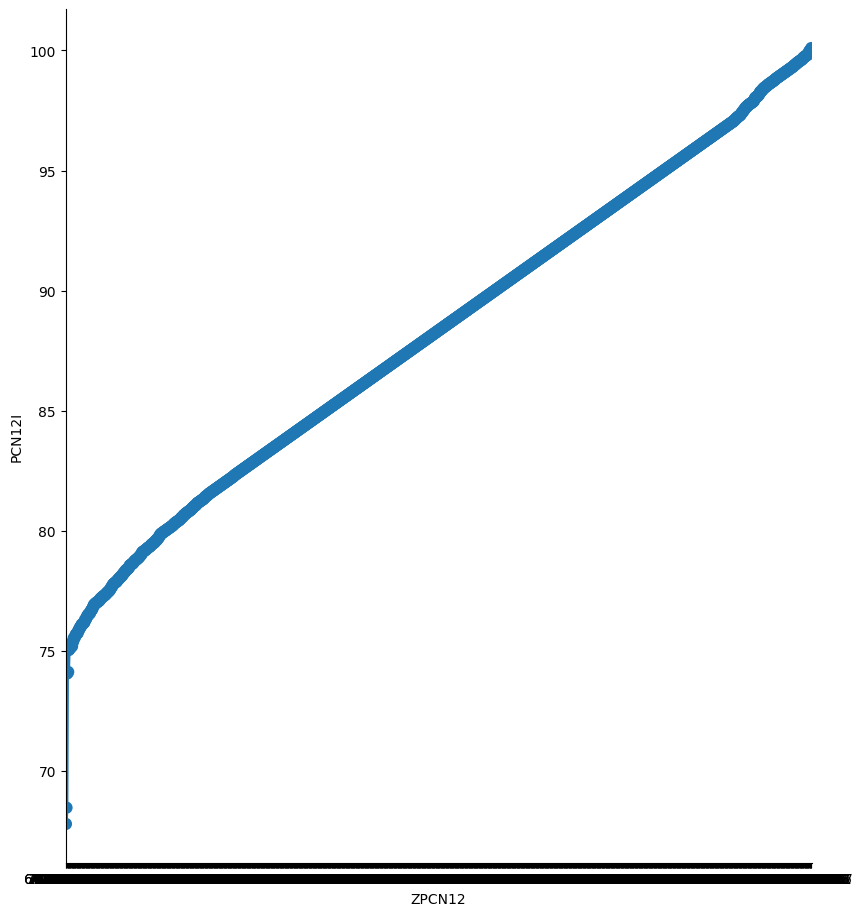

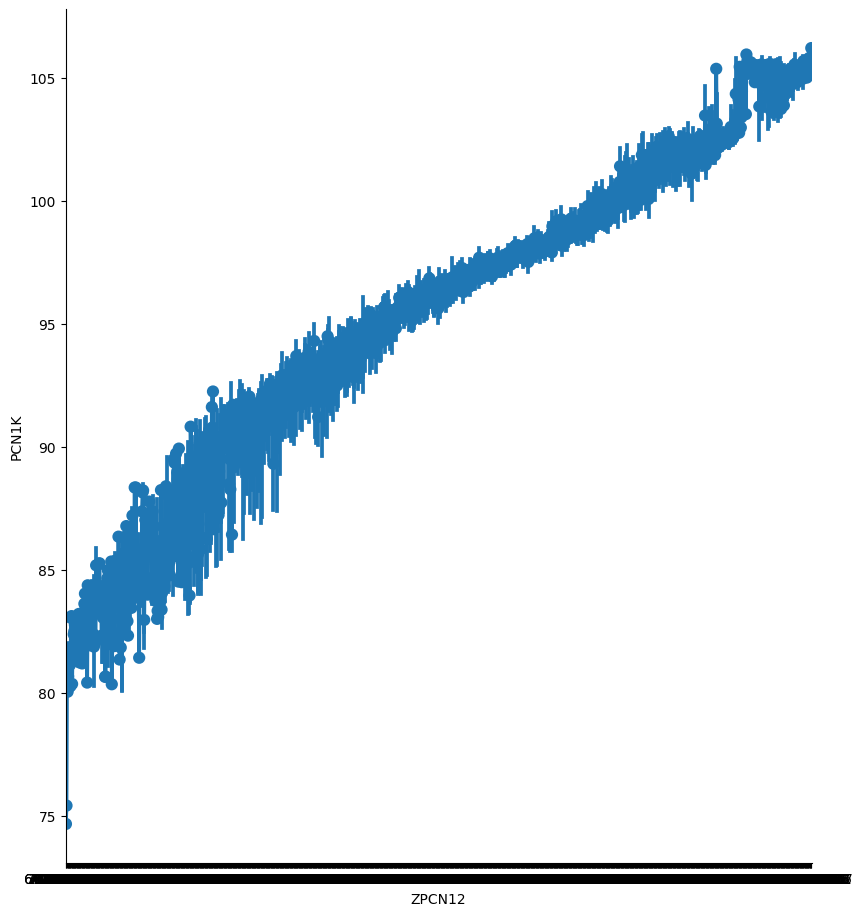

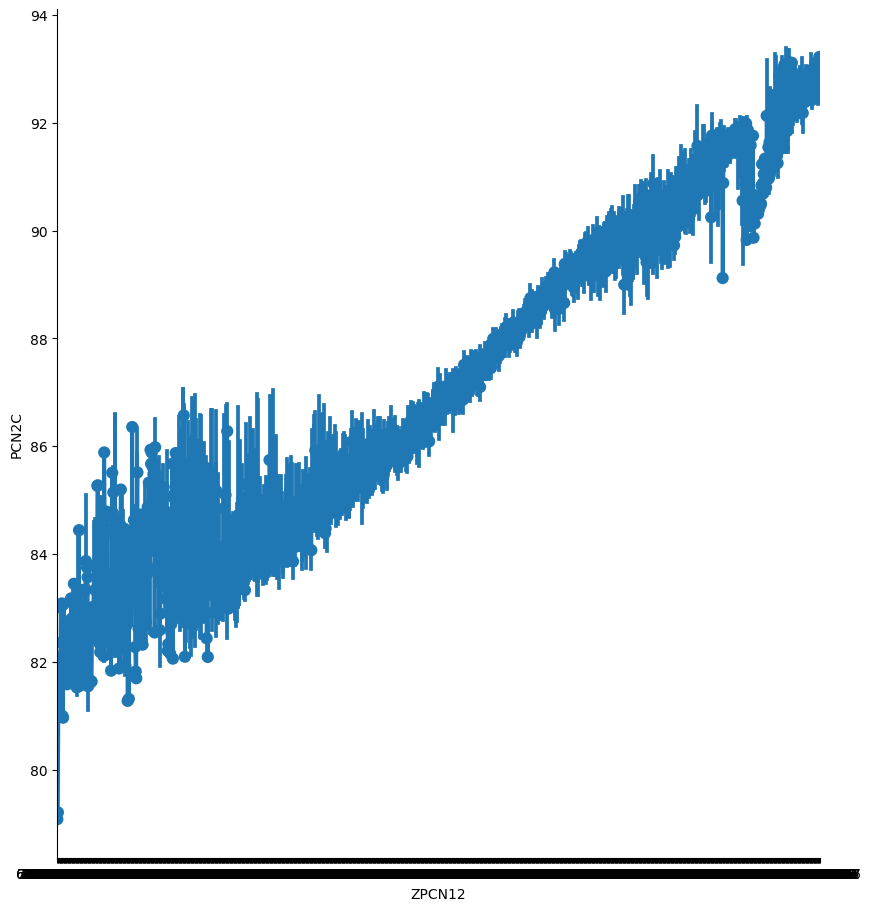

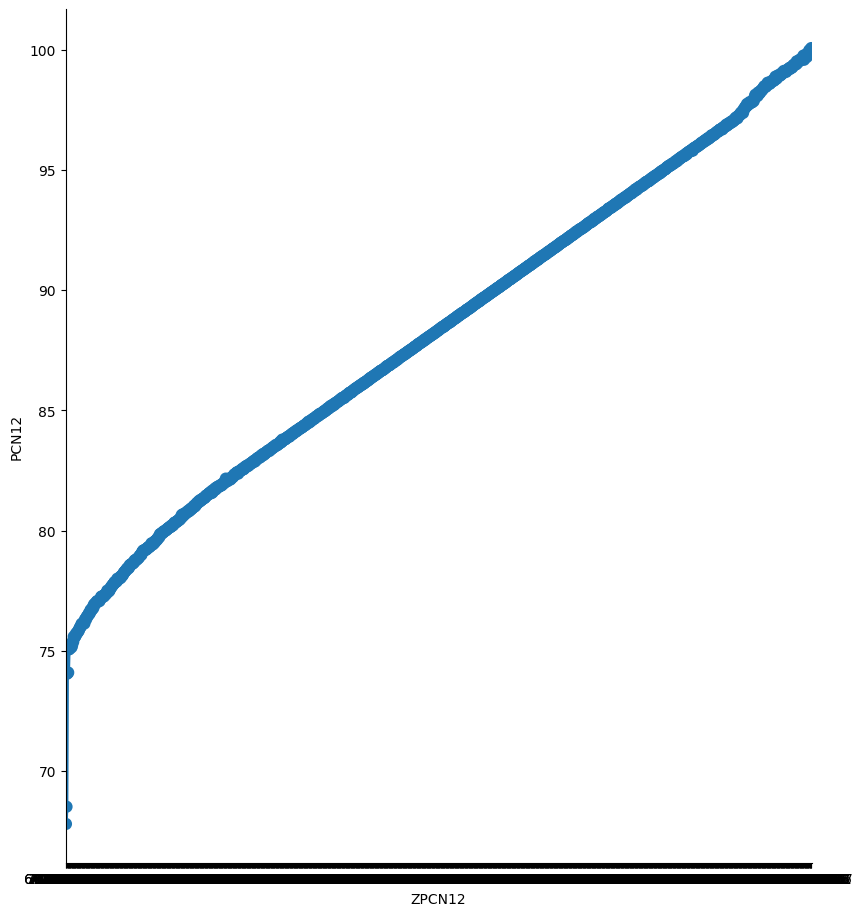

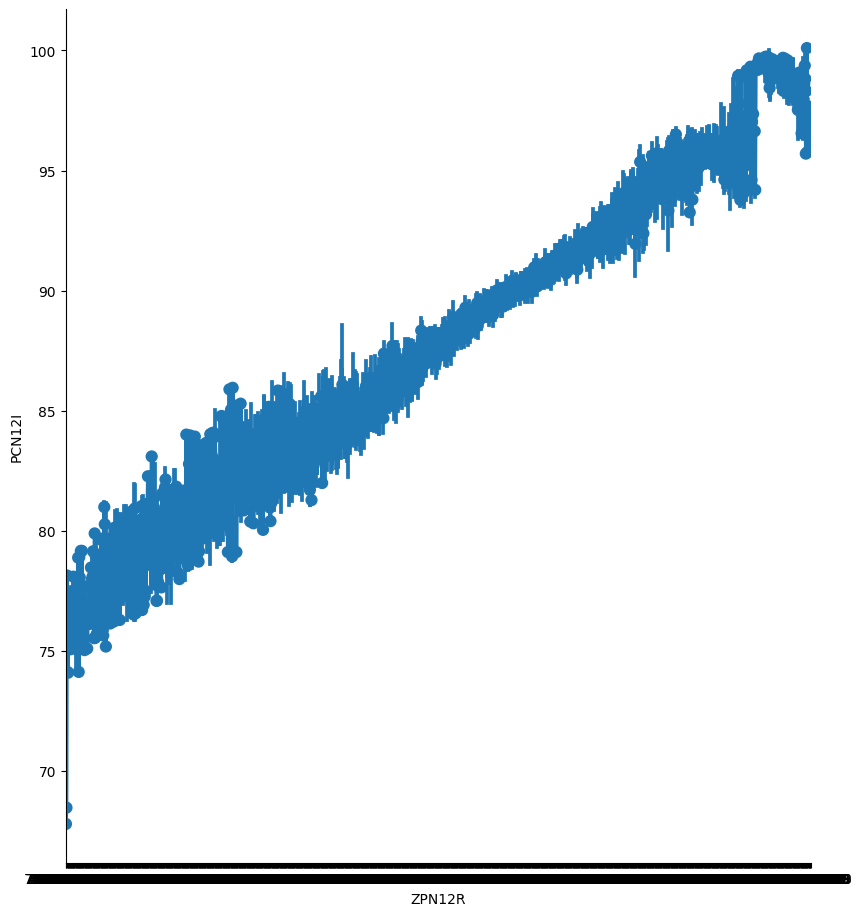

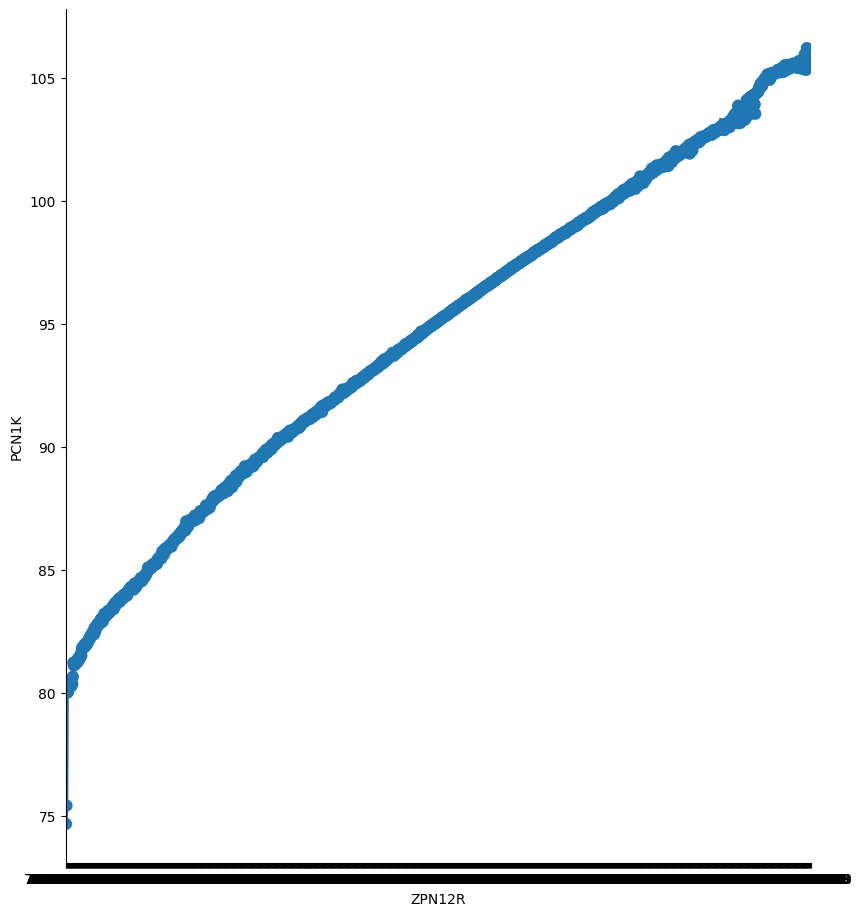

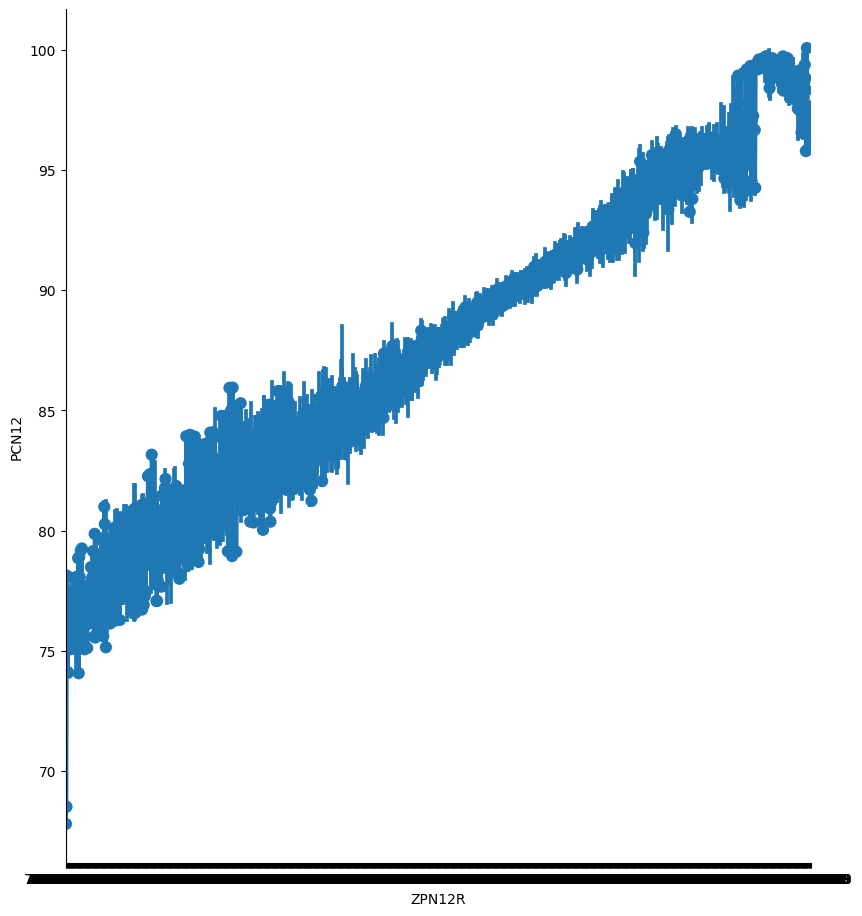

In [ ]:
plot_graphics(0.9, ("CRUISE", "CF34-8E"))

## (TAKEOFF, CF34-8E)

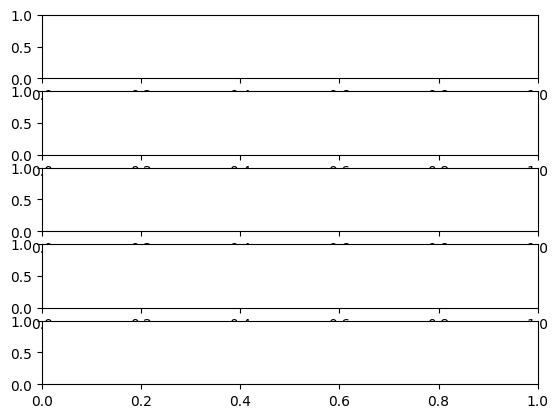

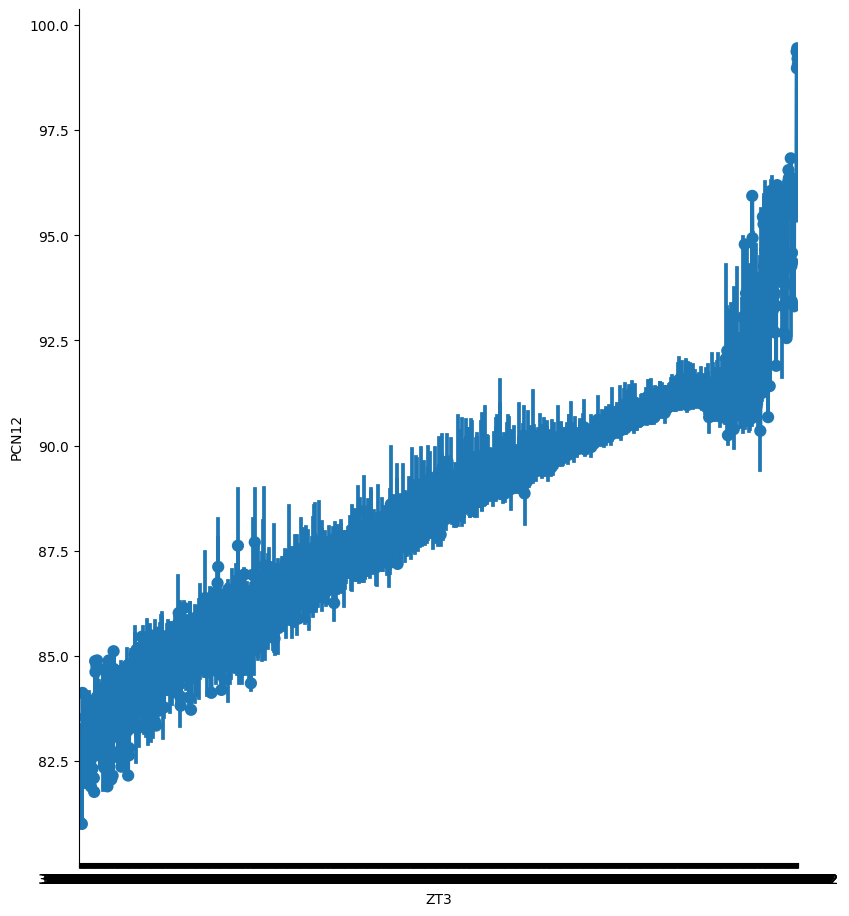

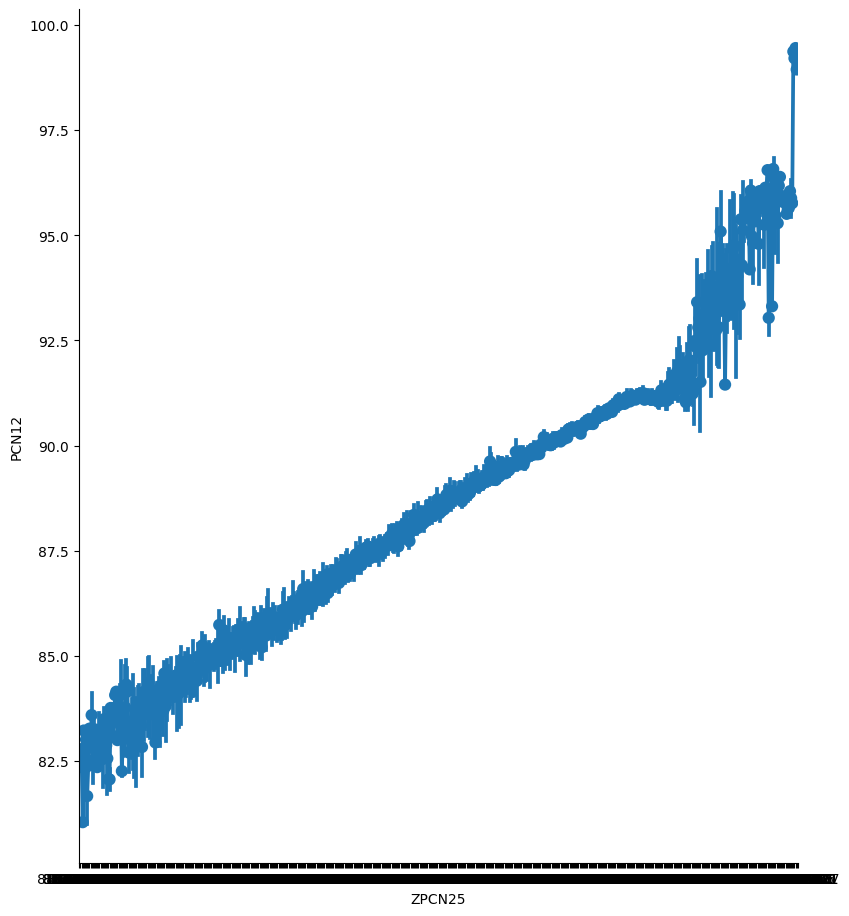

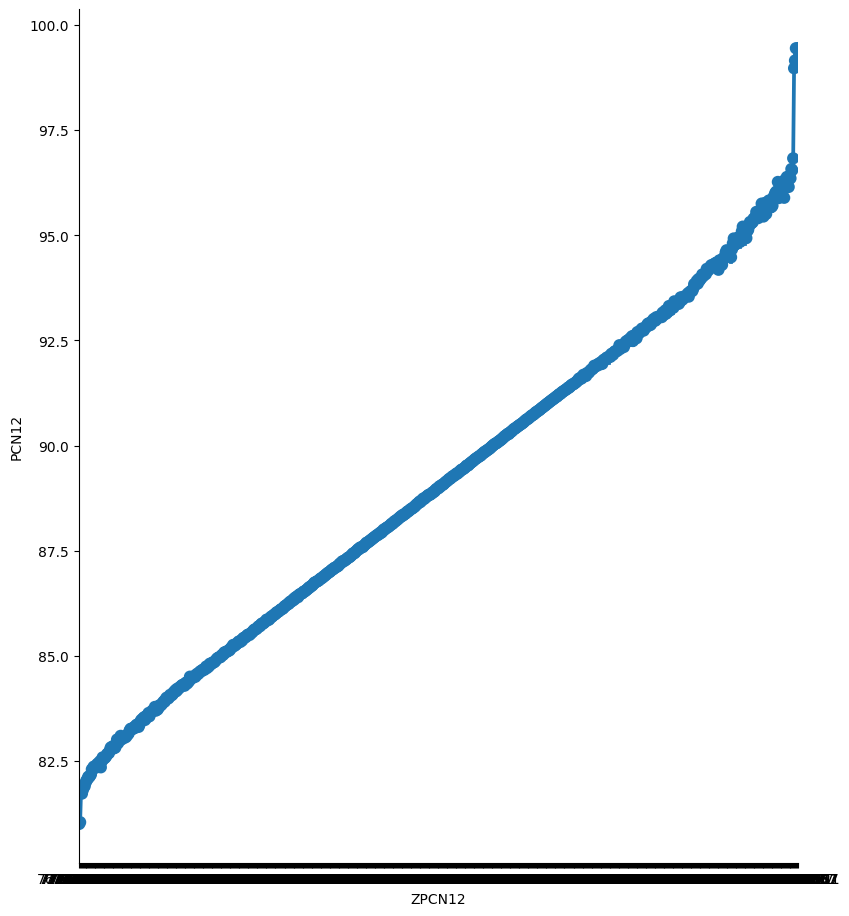

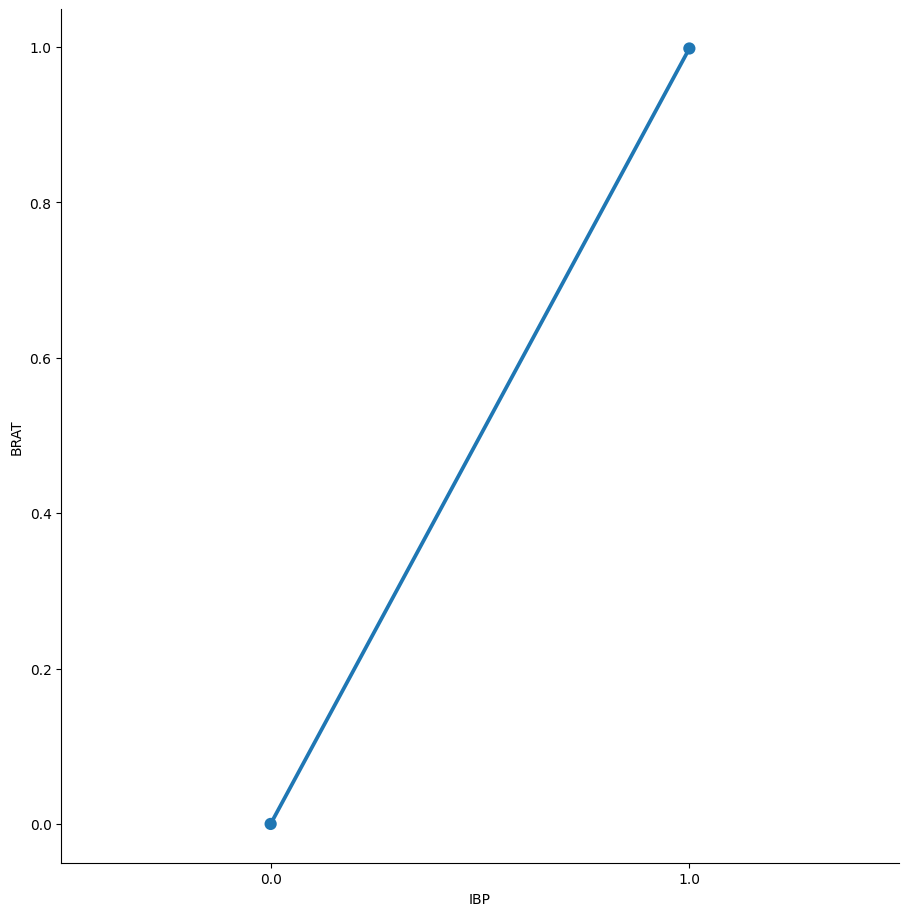

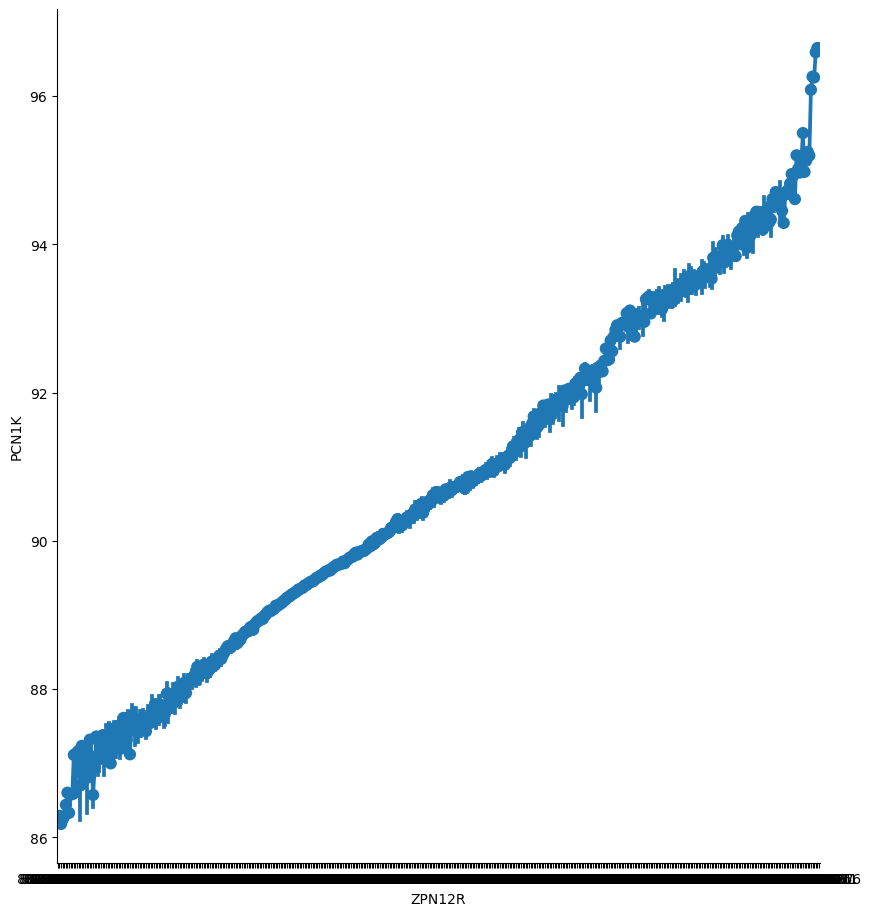

In [ ]:
plot_graphics(0.9, ("TAKEOFF", "CF34-8E"))

## (CRUISE, CFM56-5B)

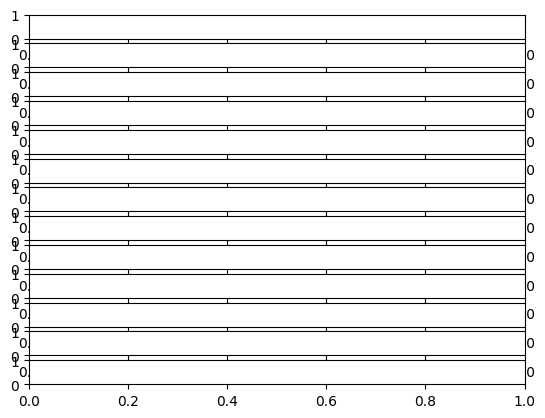

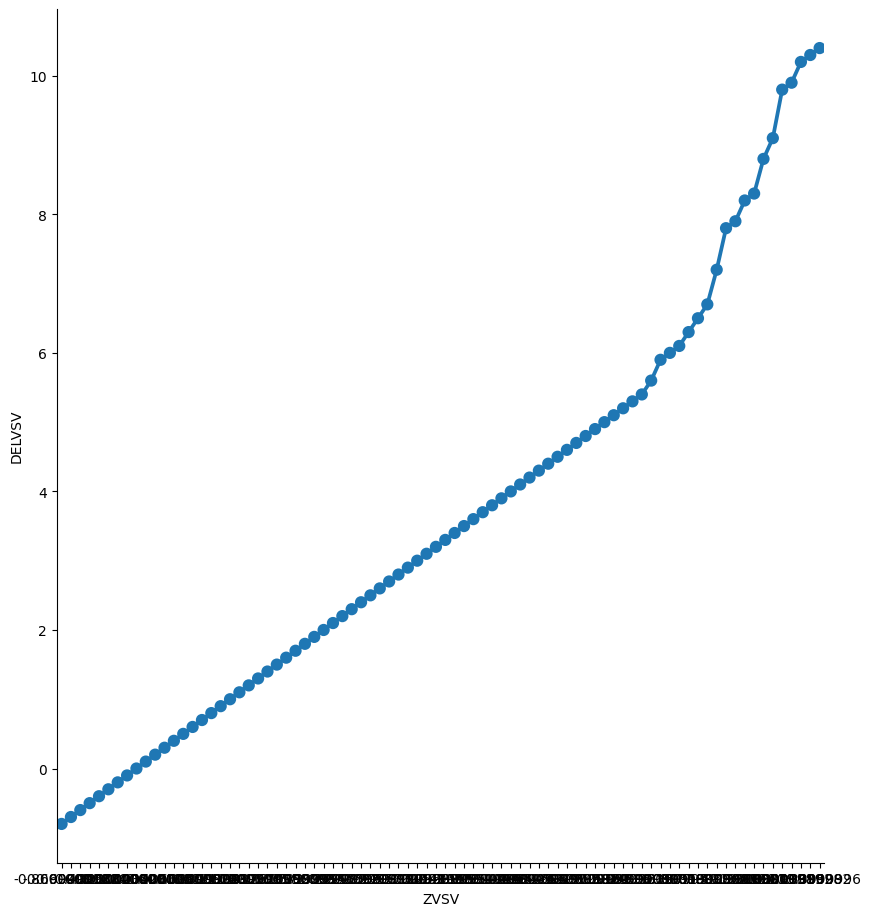

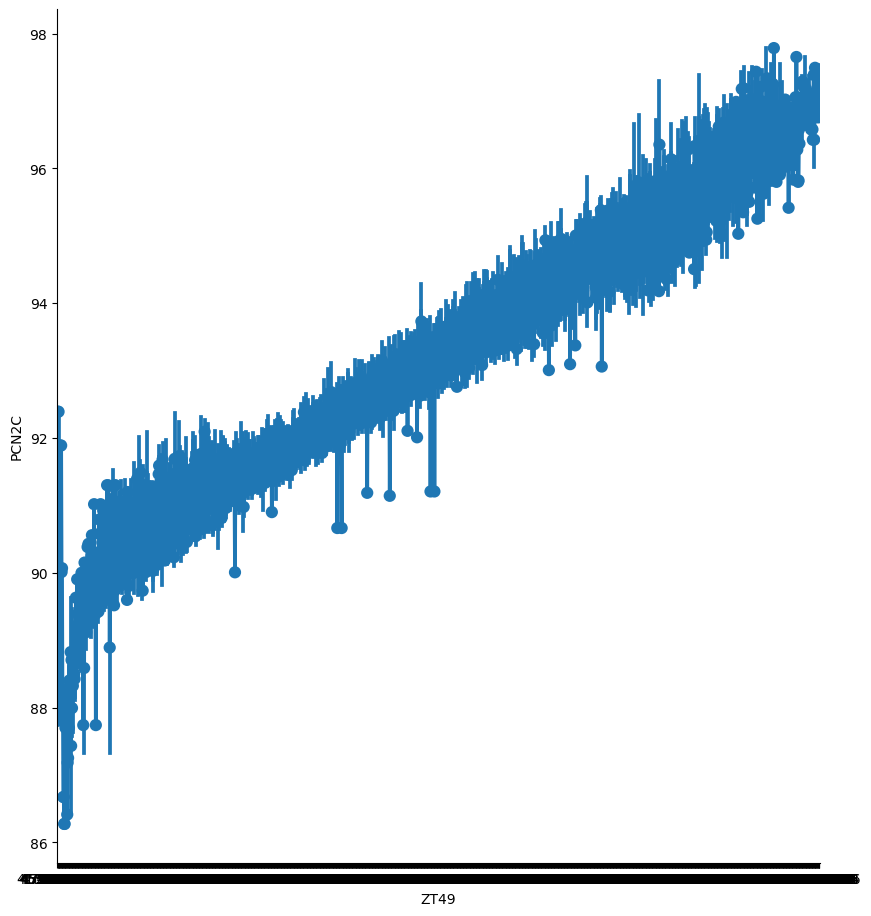

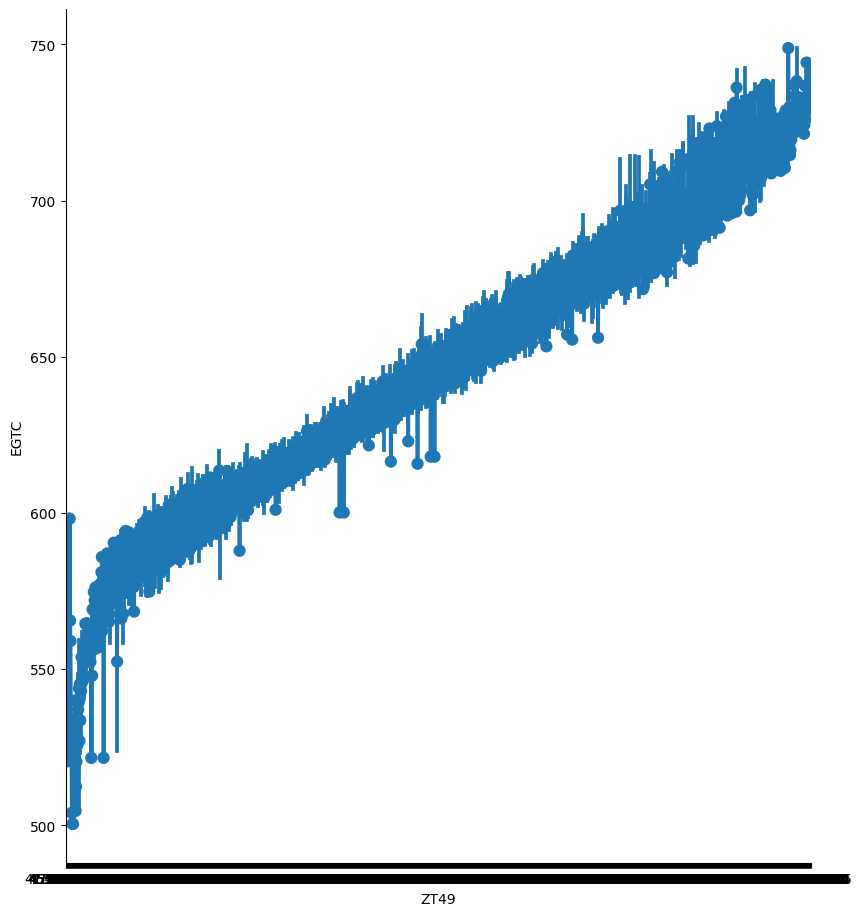

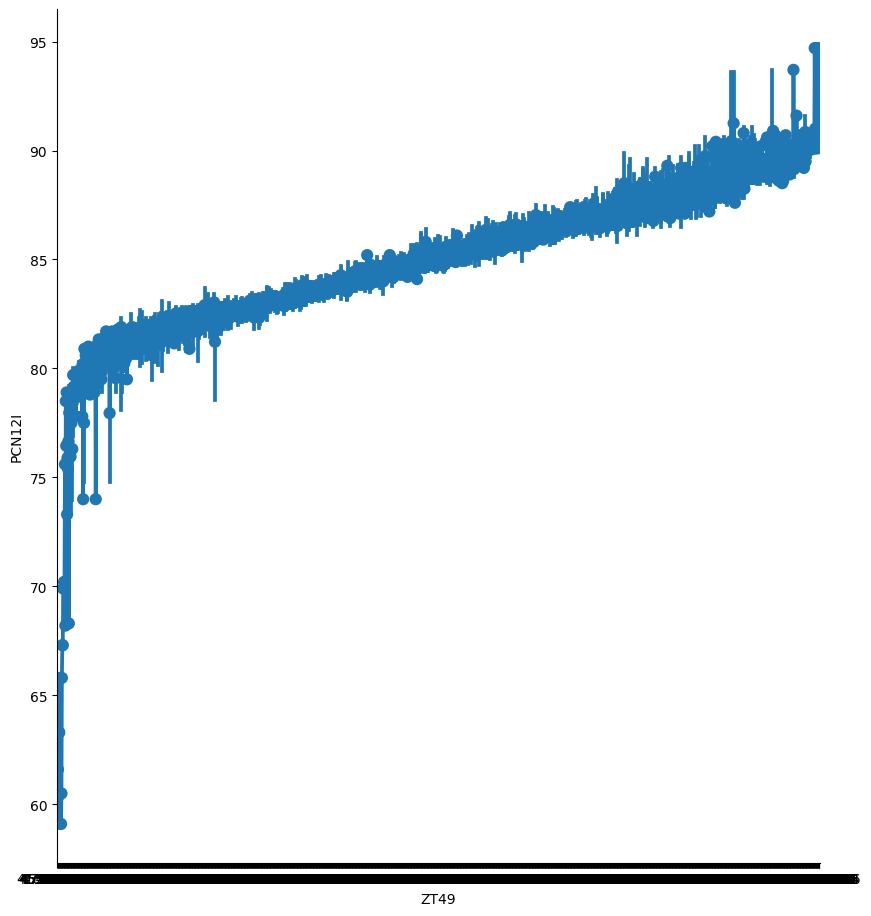

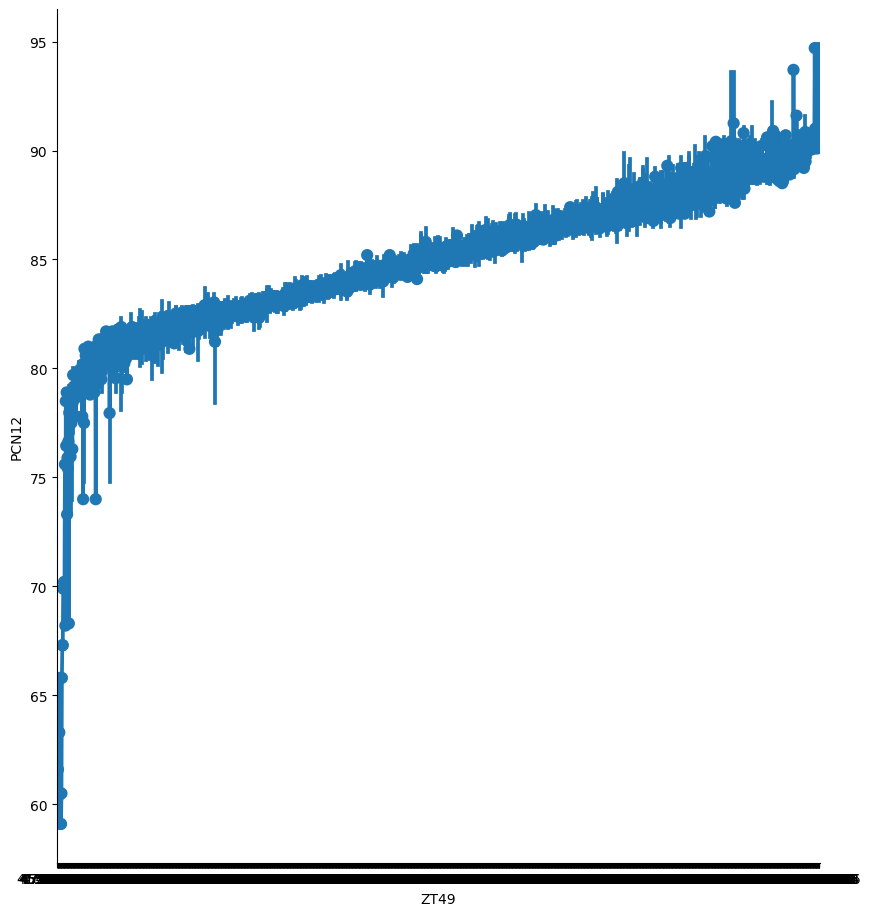

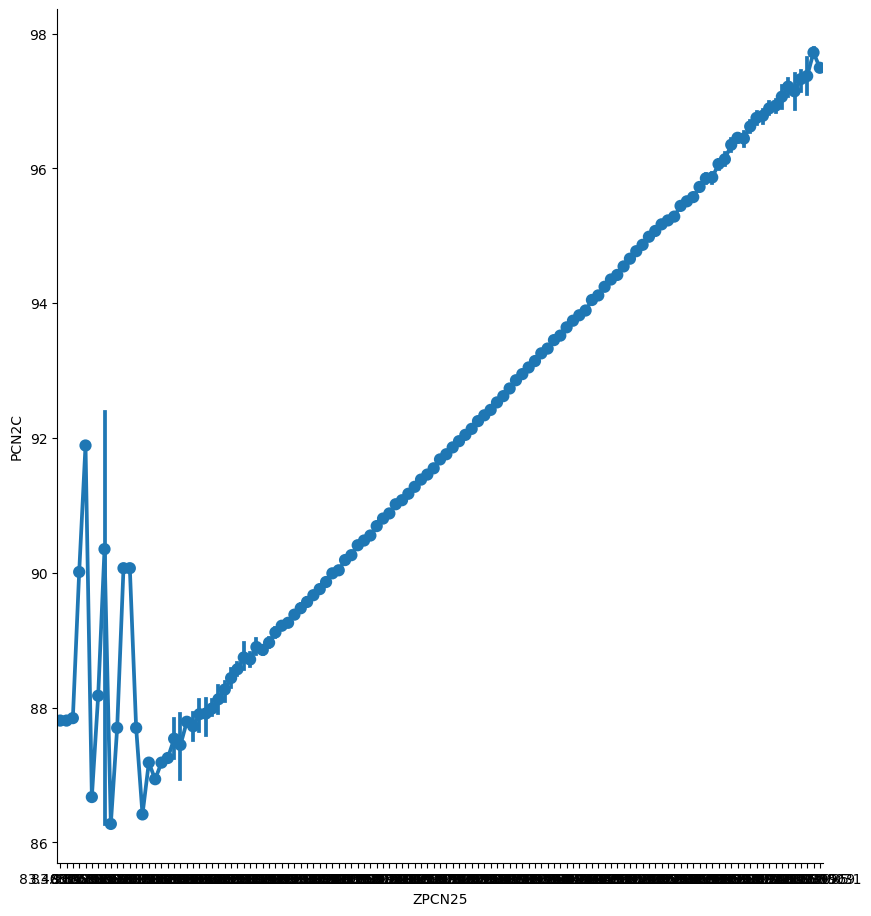

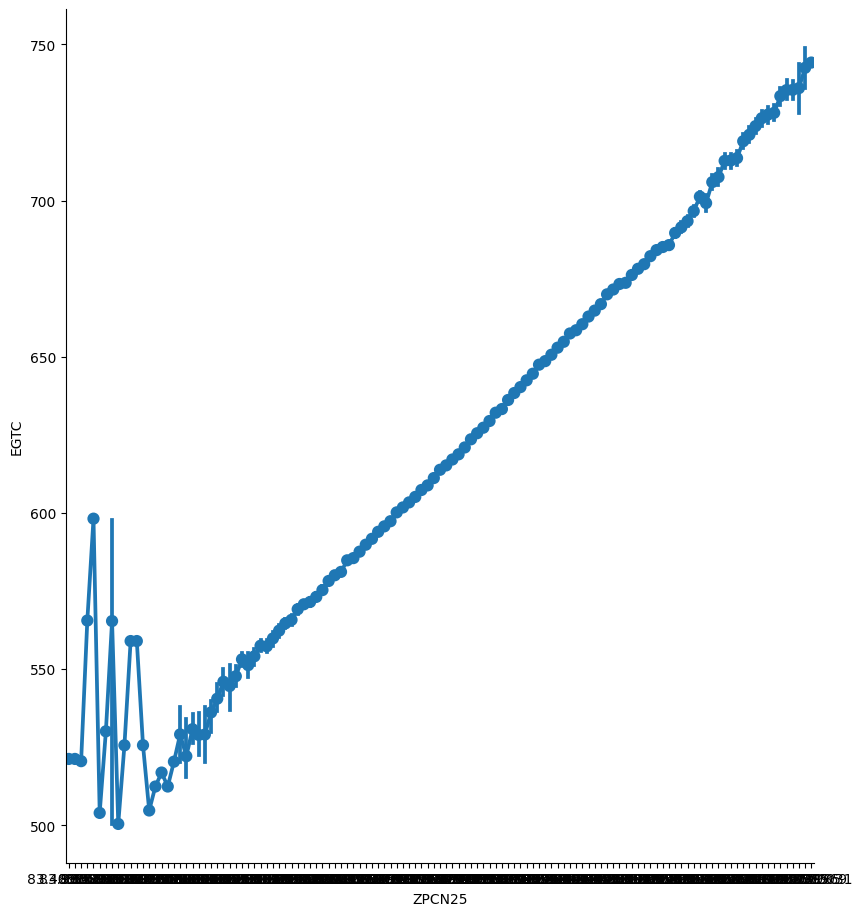

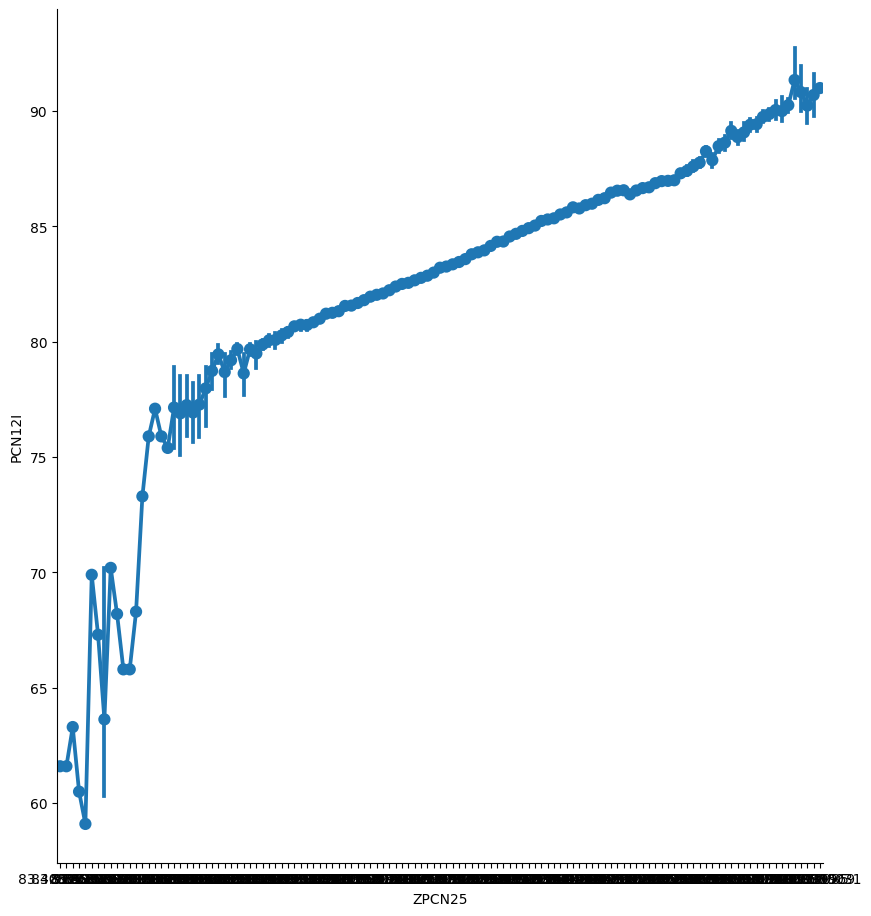

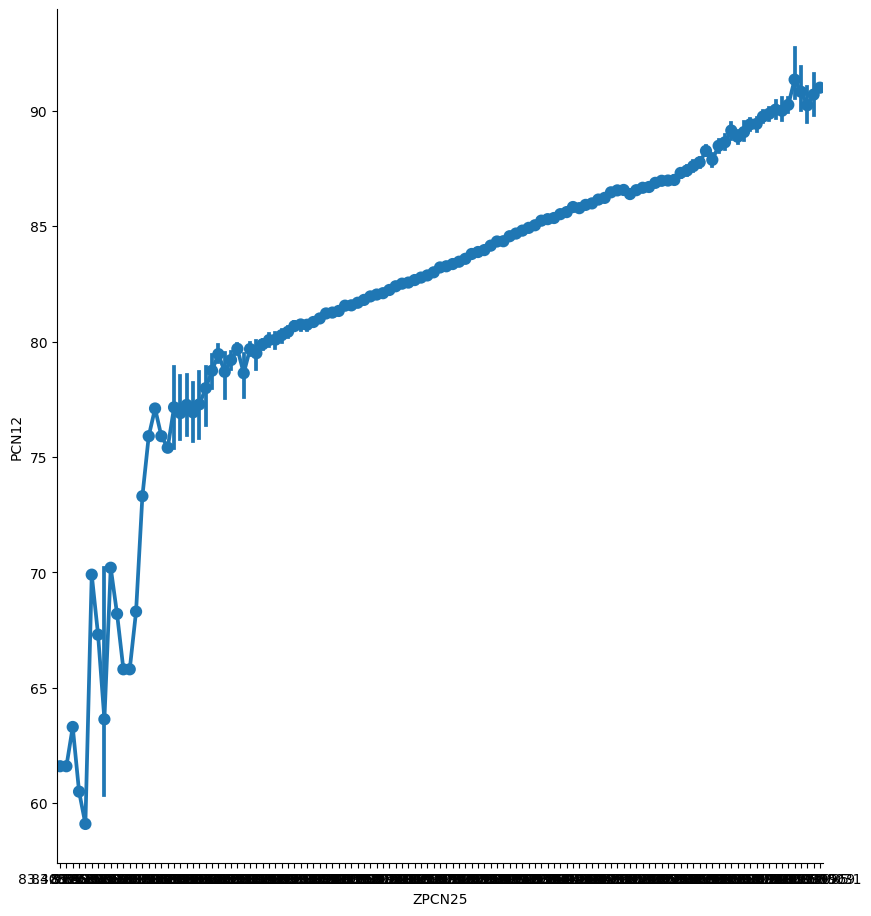

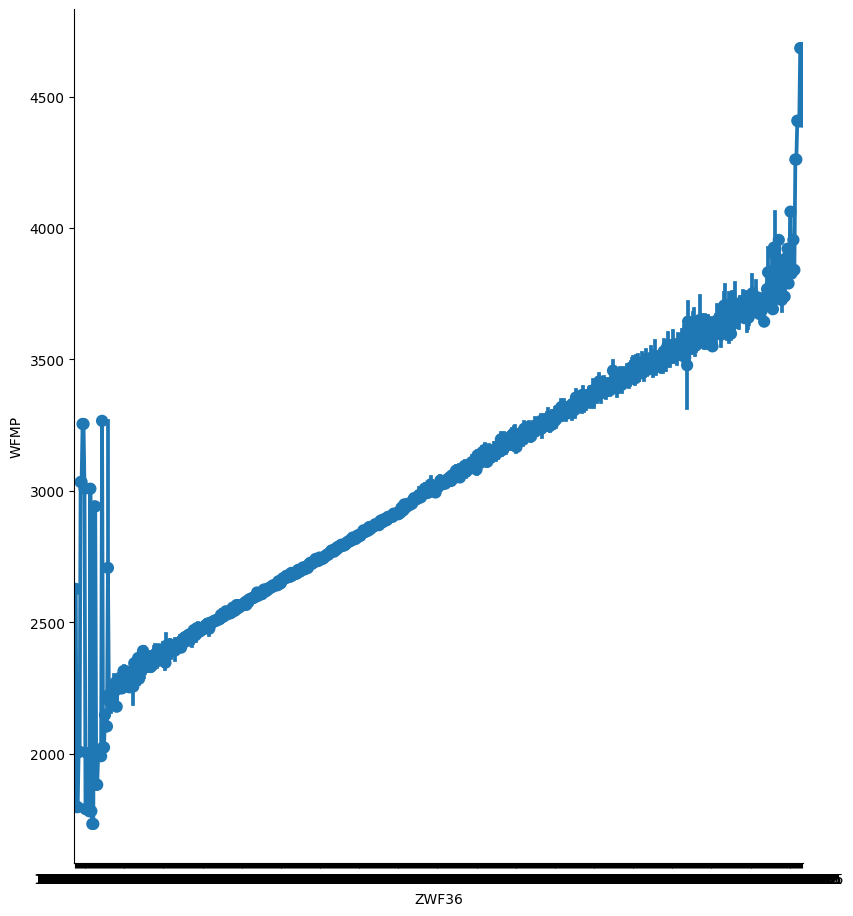

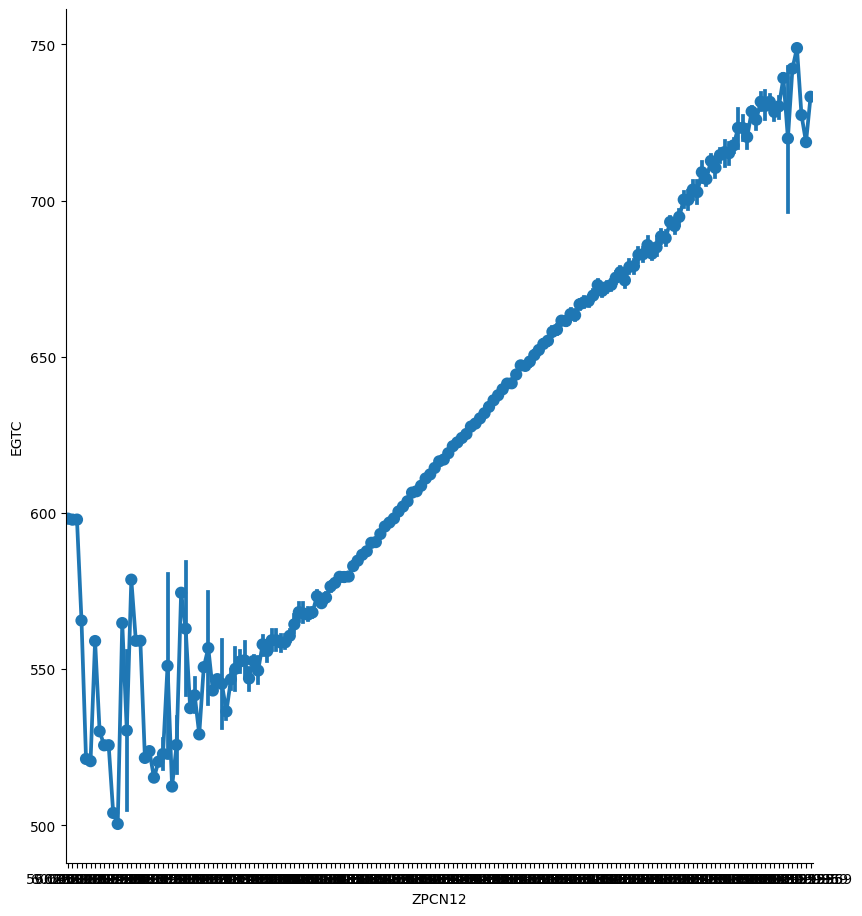

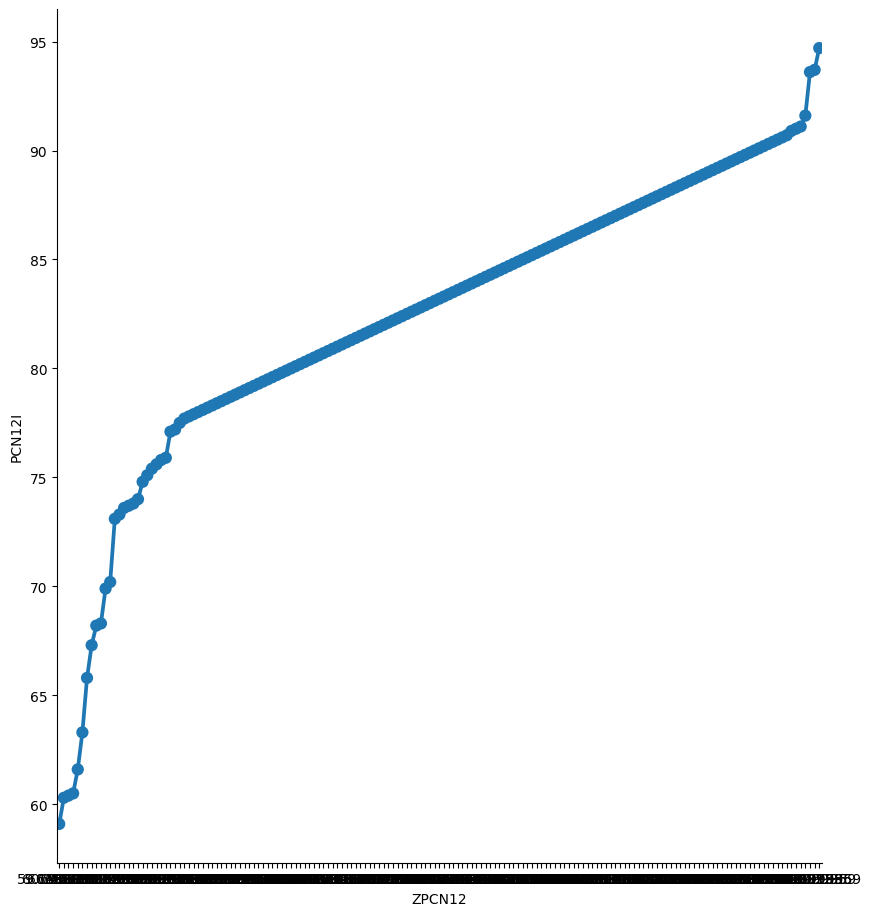

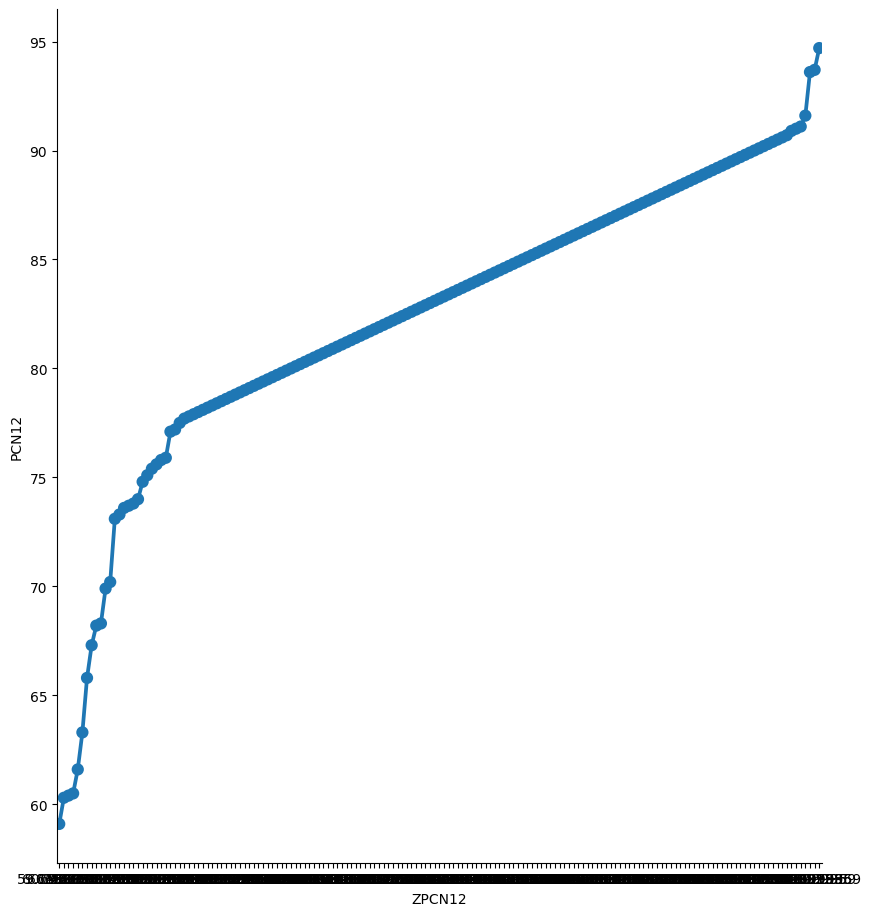

In [ ]:
plot_graphics(0.9, ("CRUISE", "CFM56-5B"))

## (TAKEOFF, CFM56-5B)

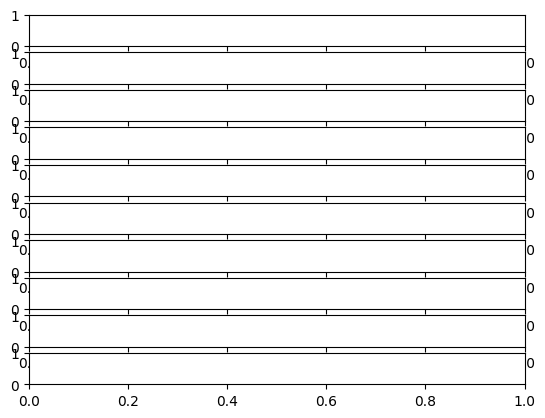

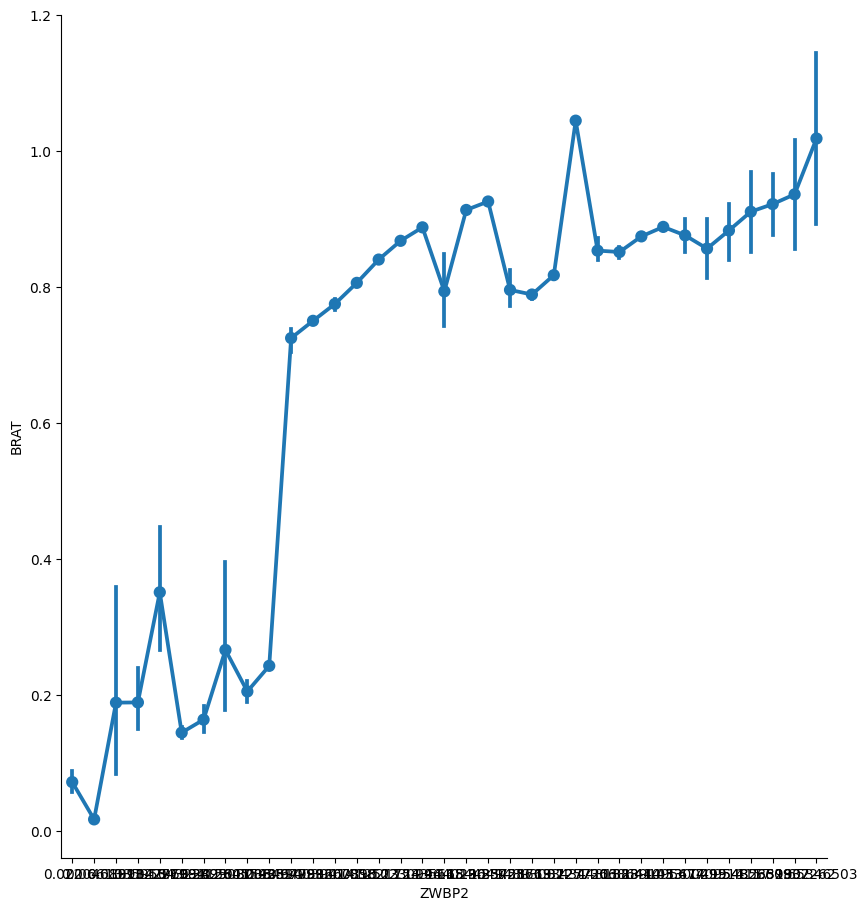

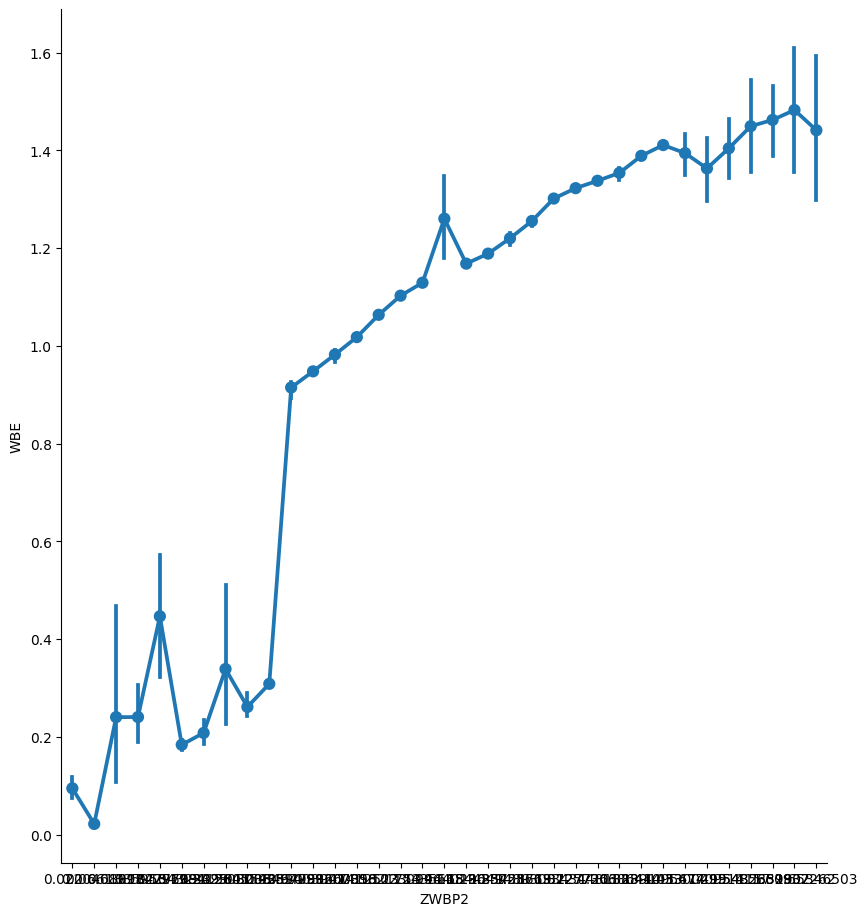

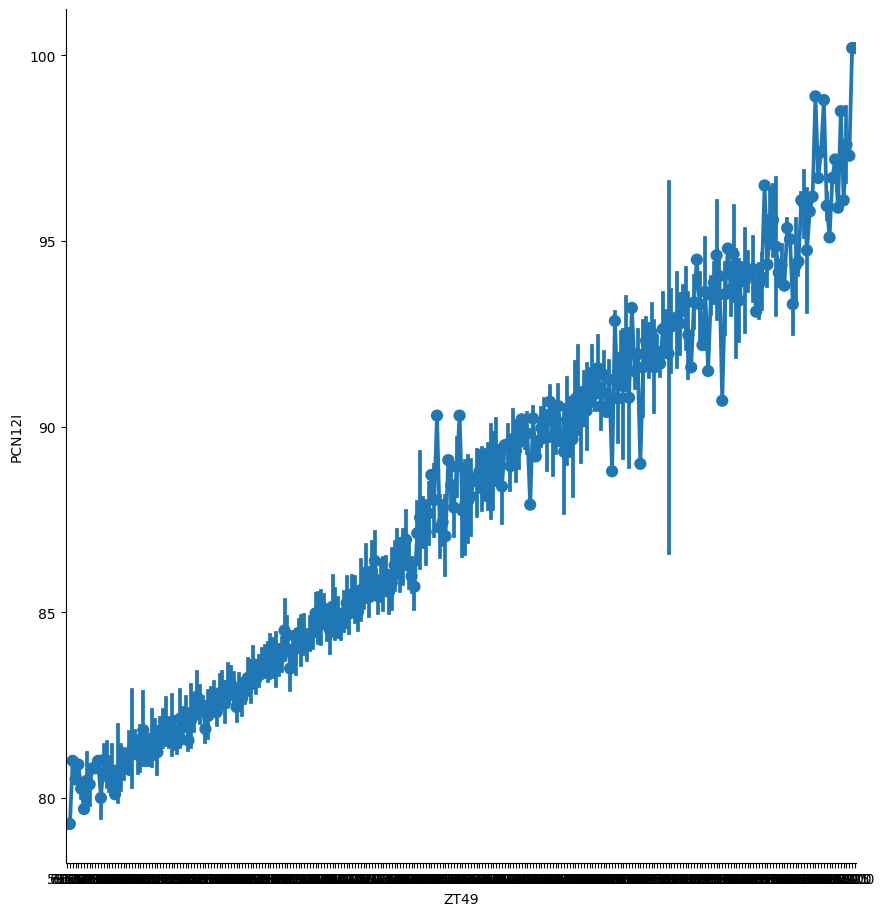

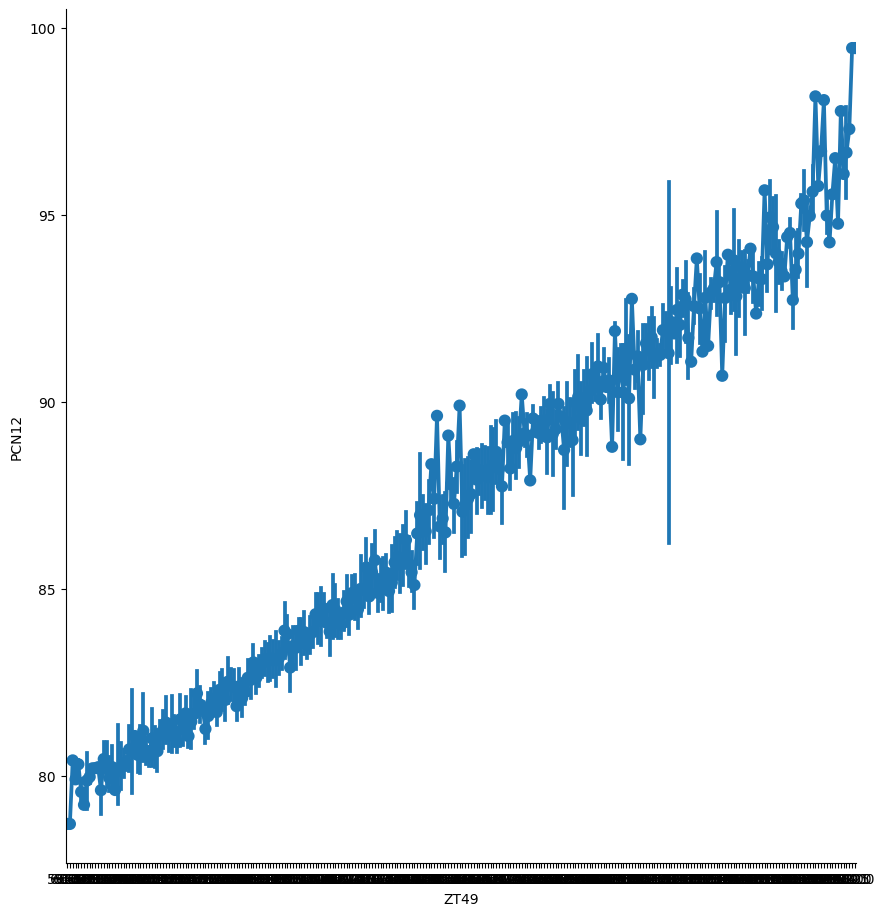

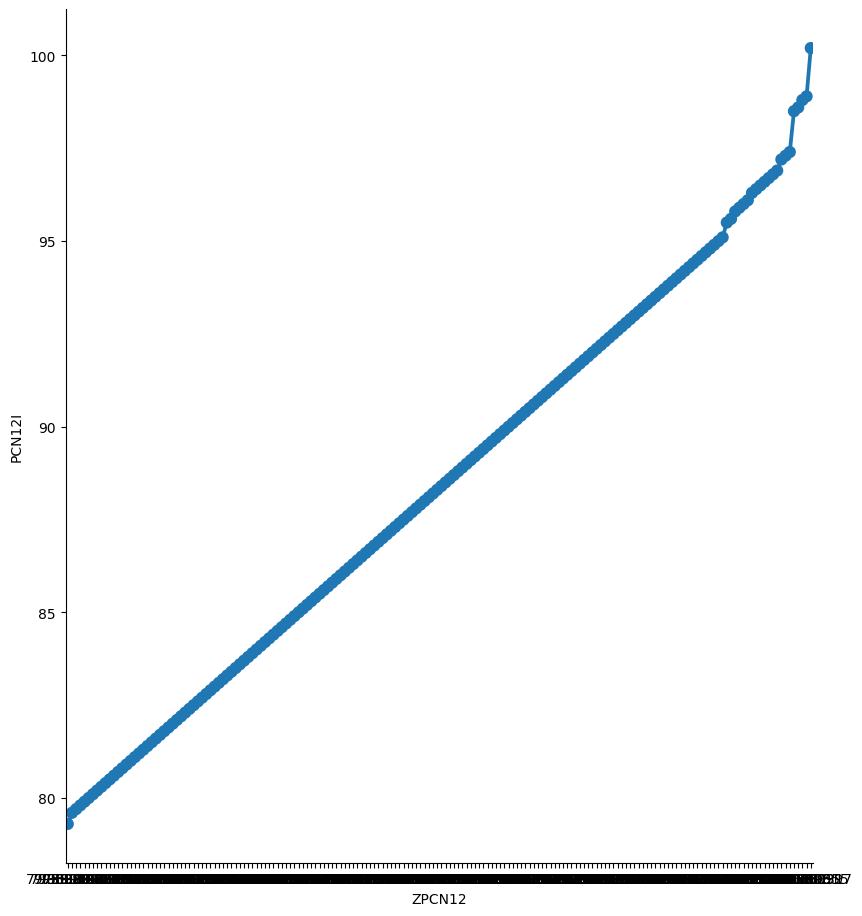

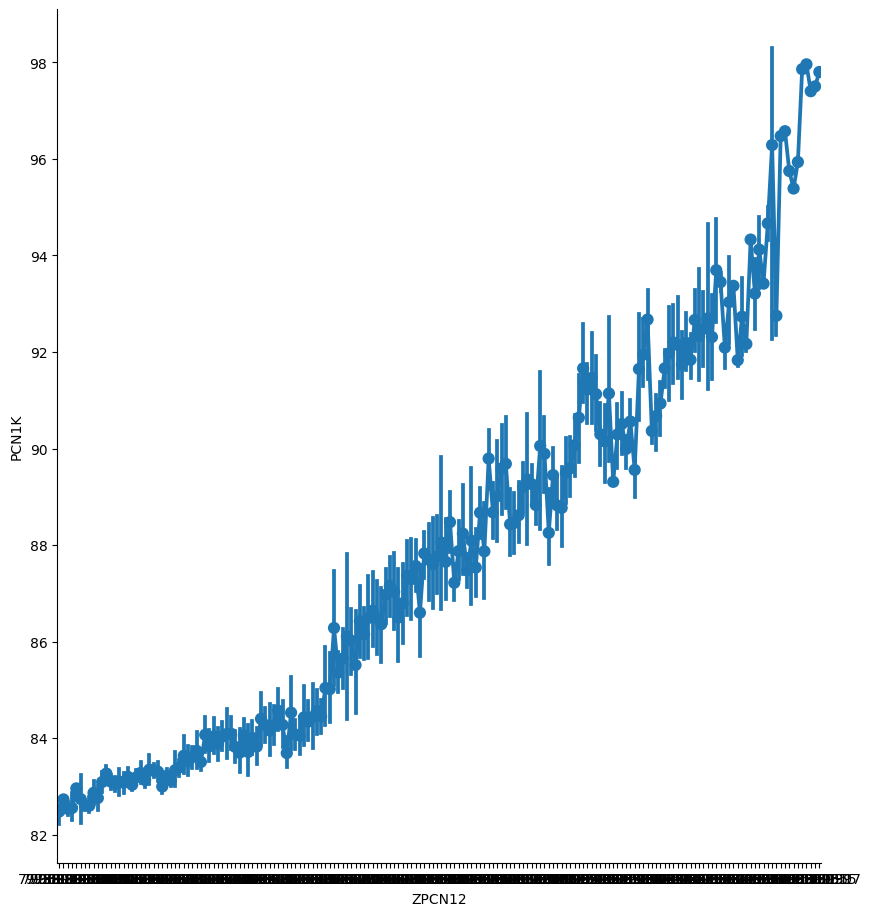

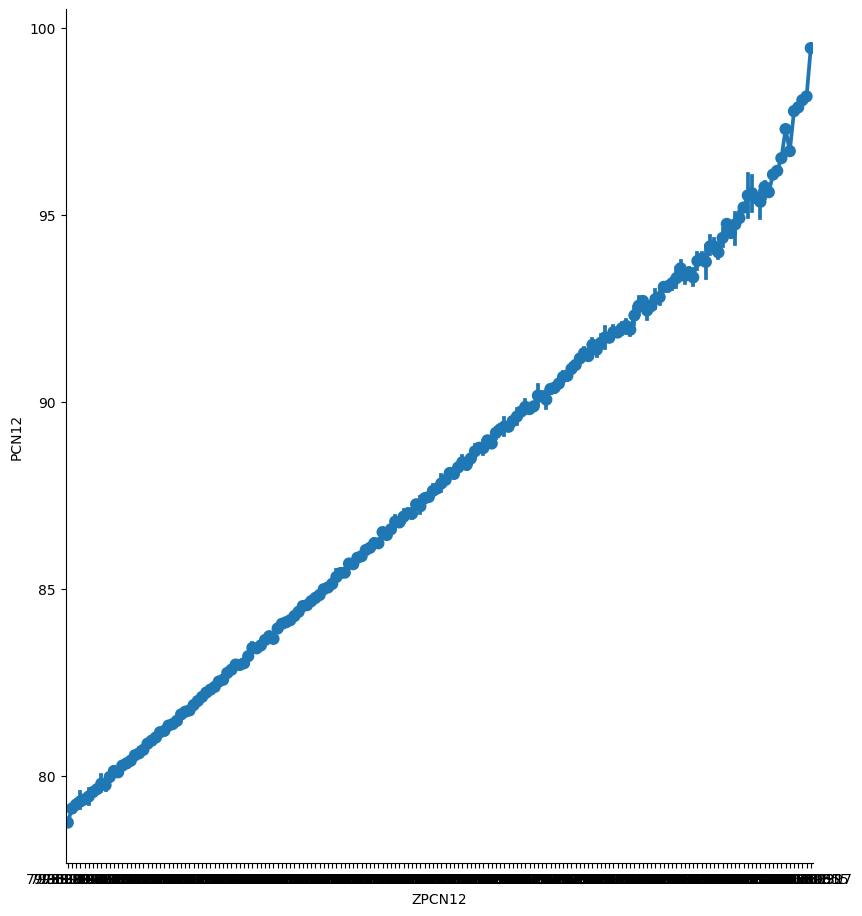

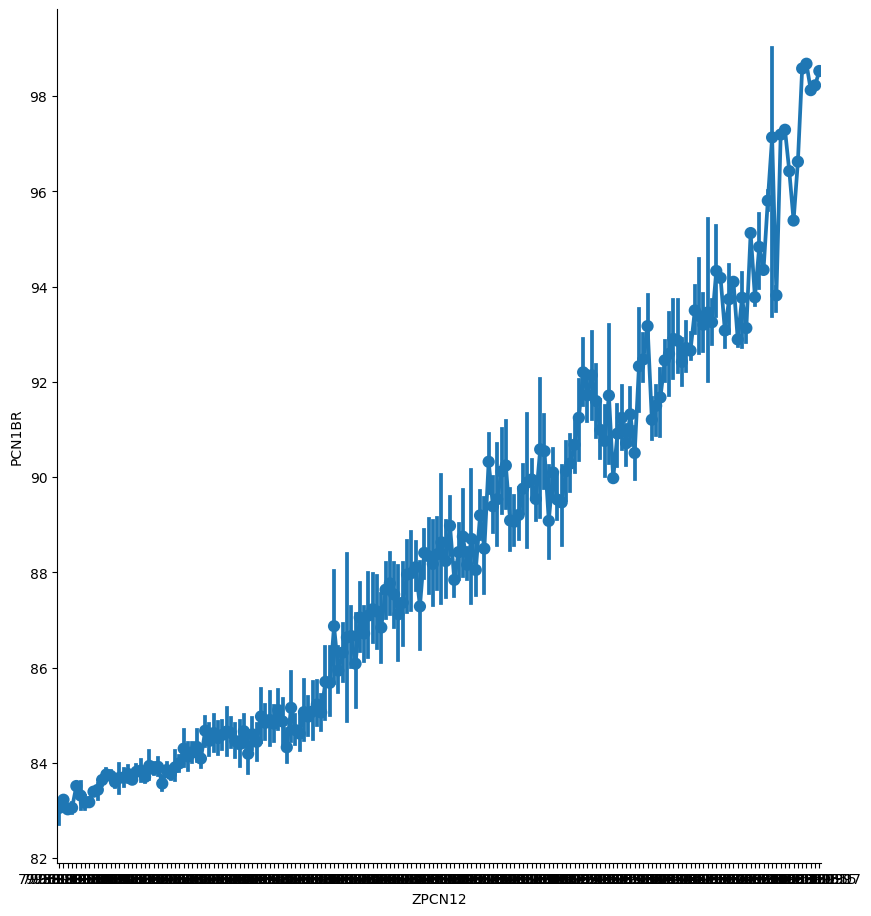

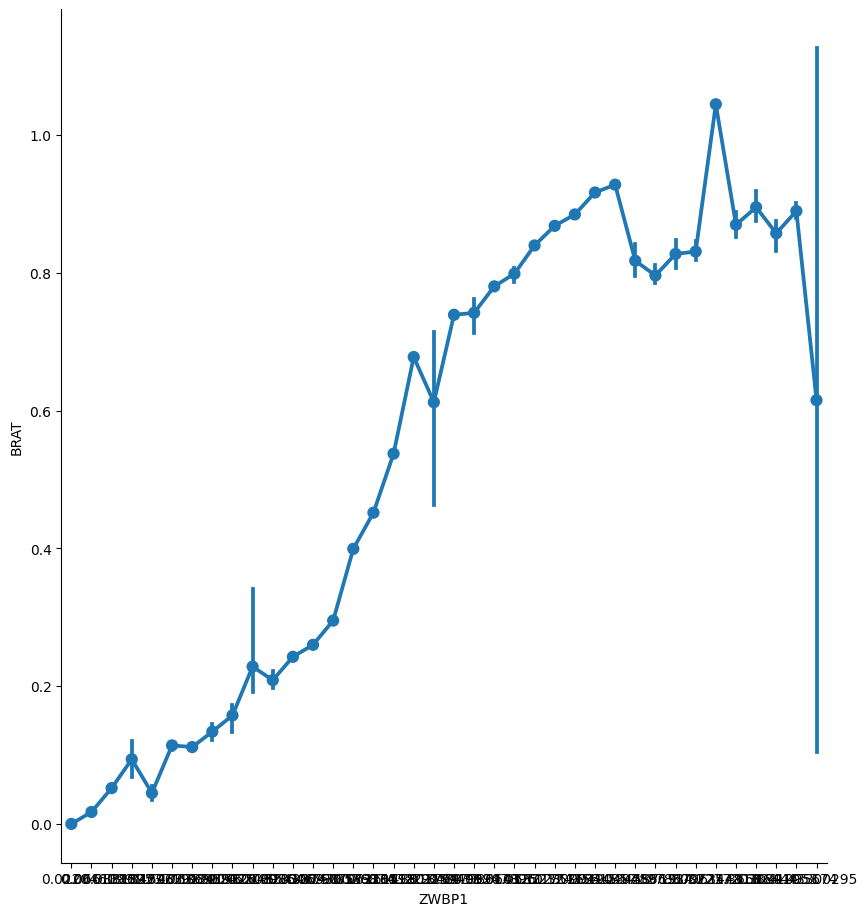

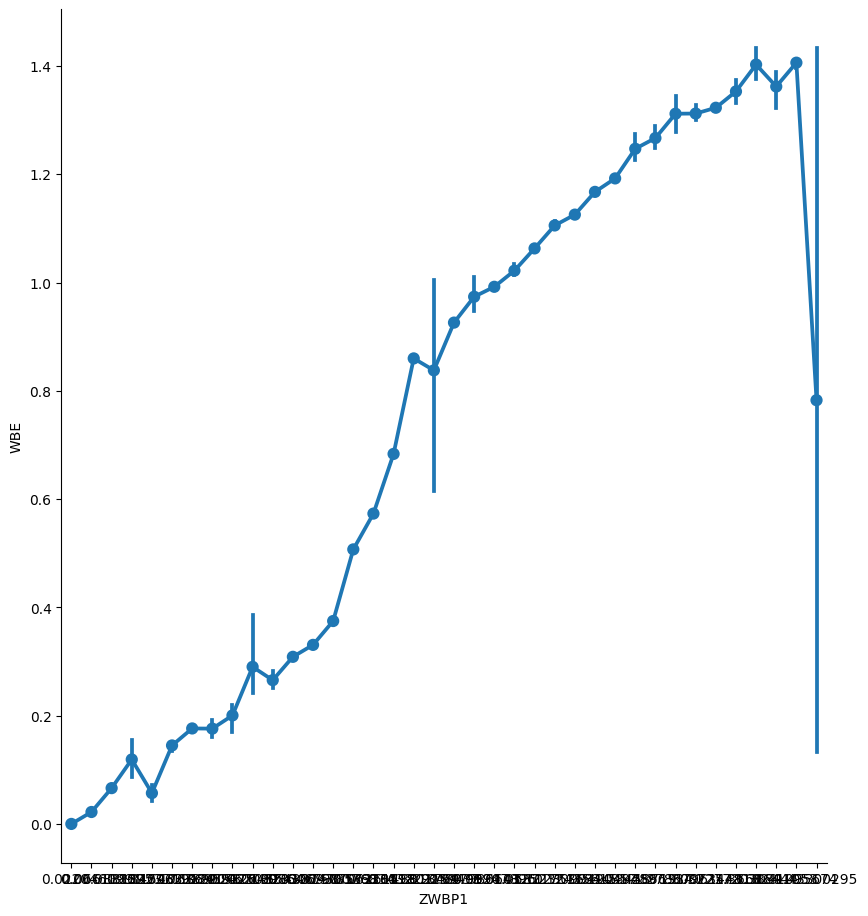

In [ ]:
plot_graphics(0.9, ("TAKEOFF", "CFM56-5B"))

## (CRUISE, CFM56-7)

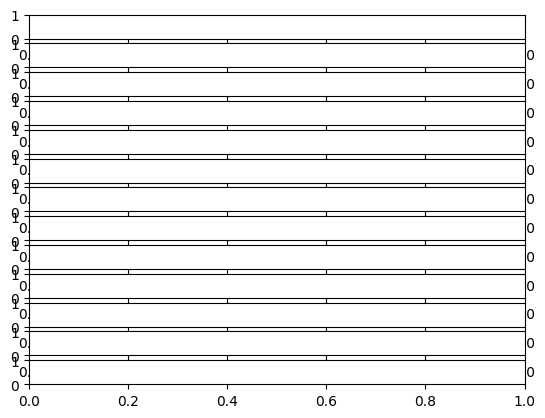

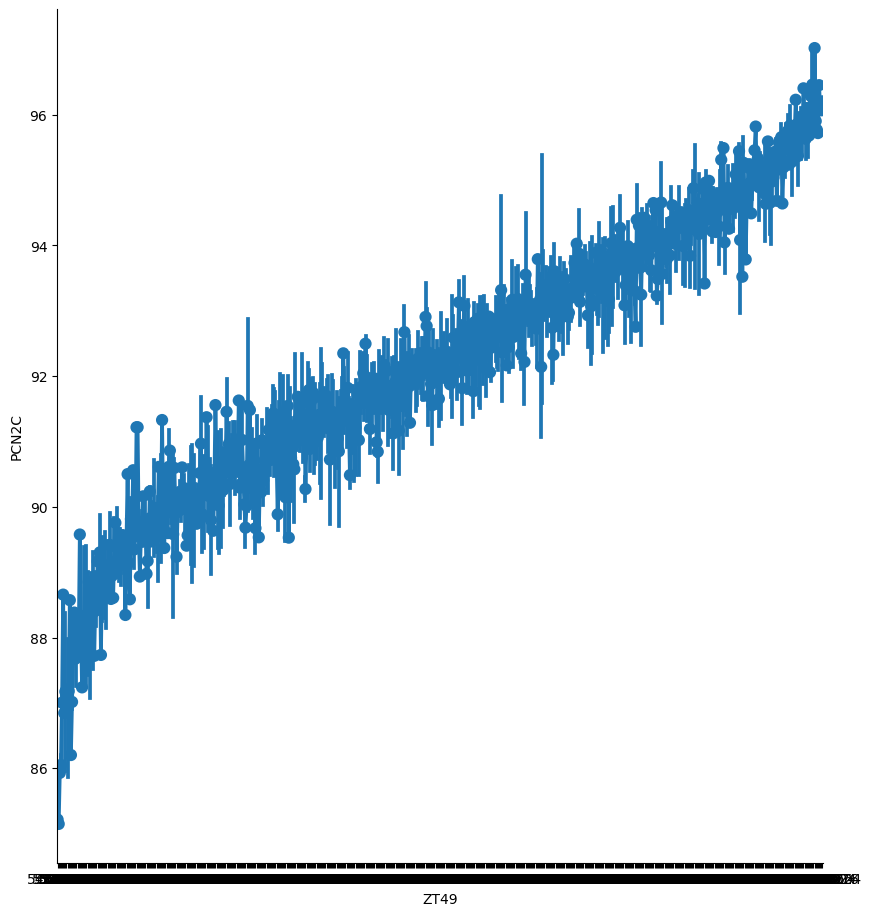

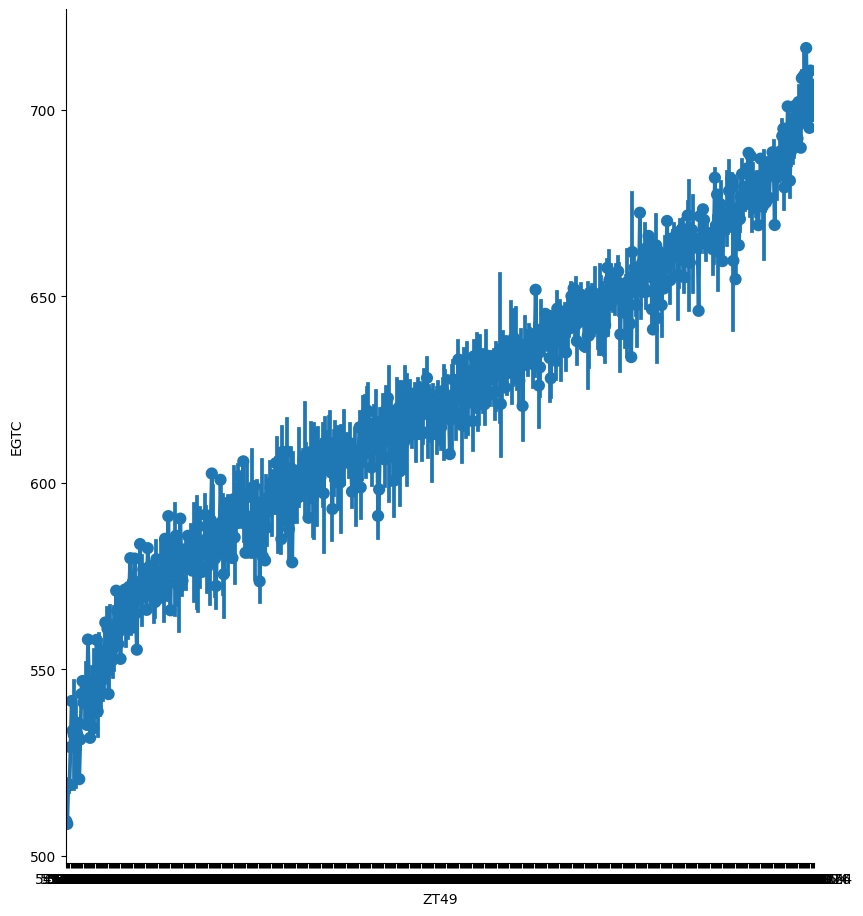

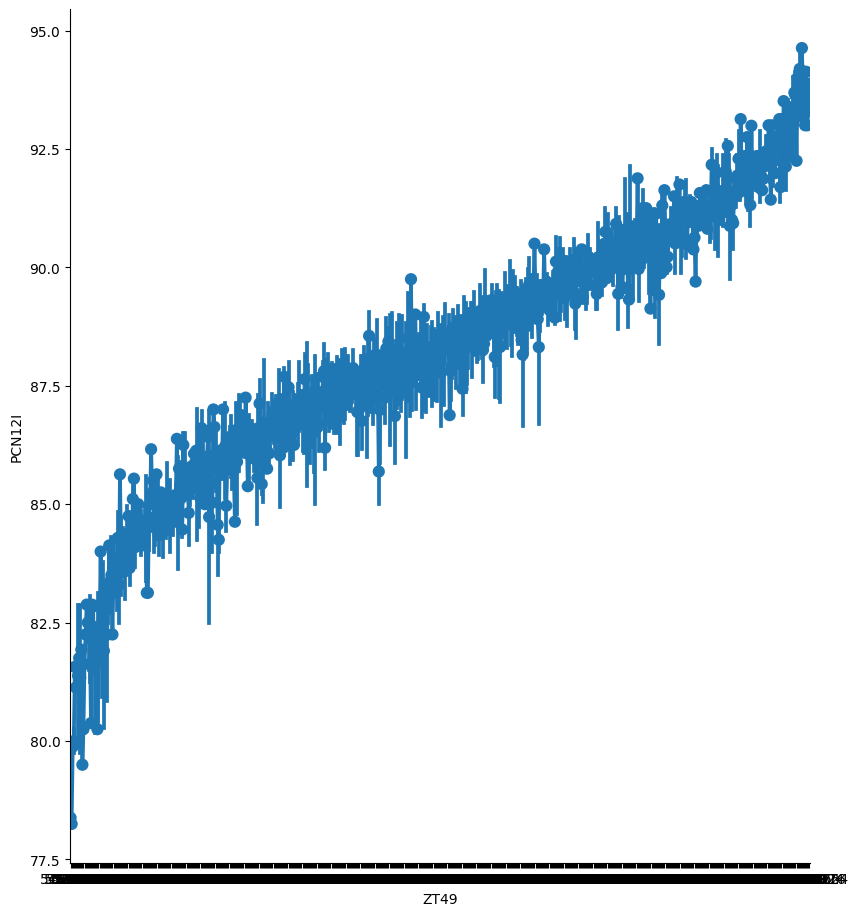

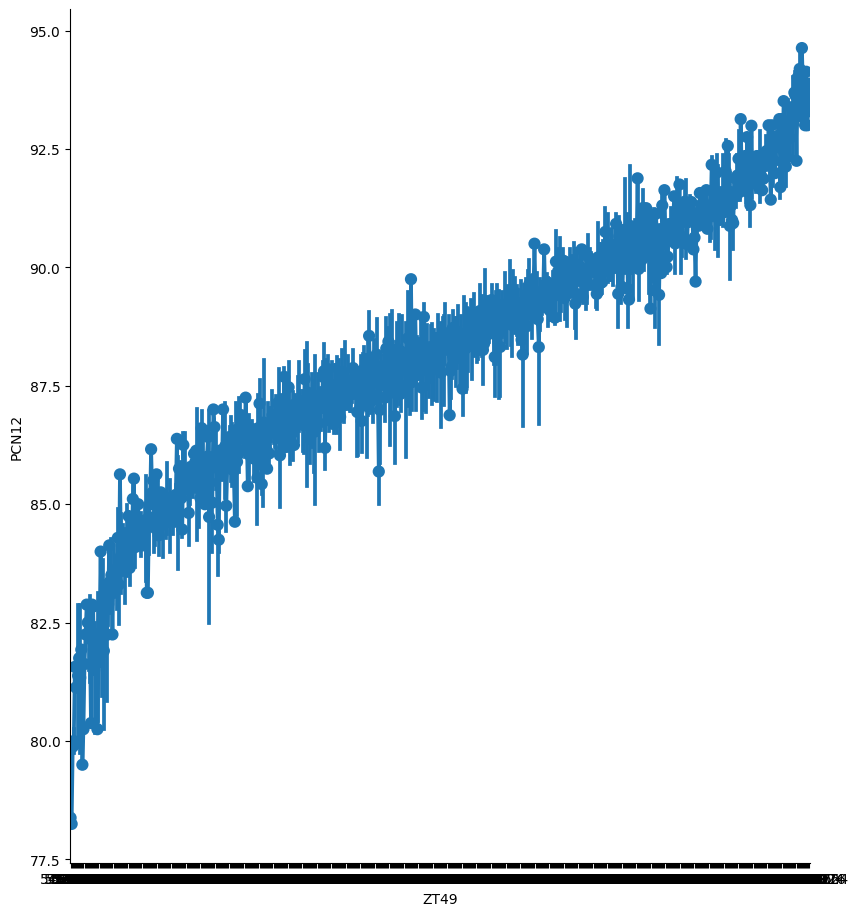

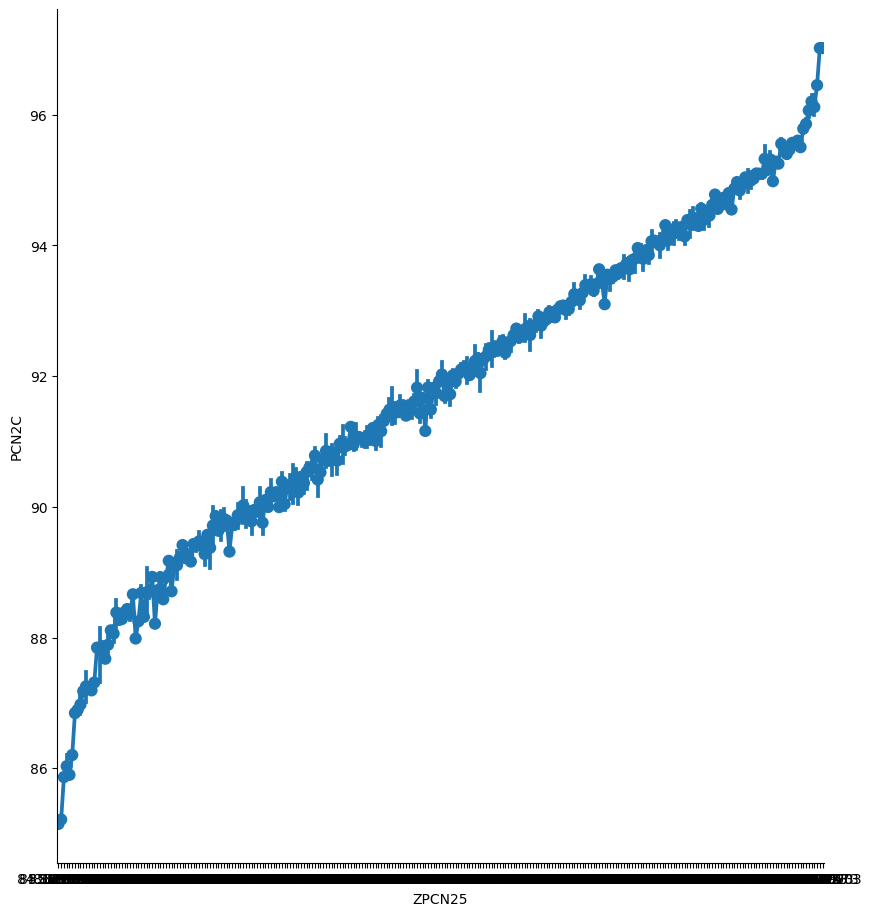

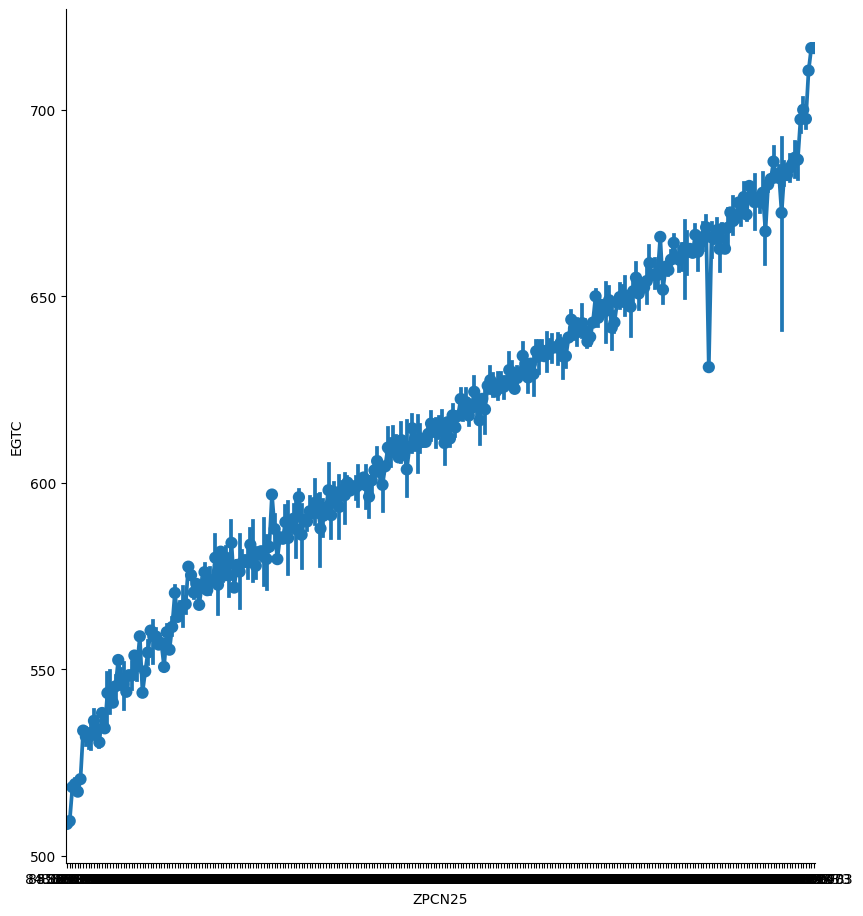

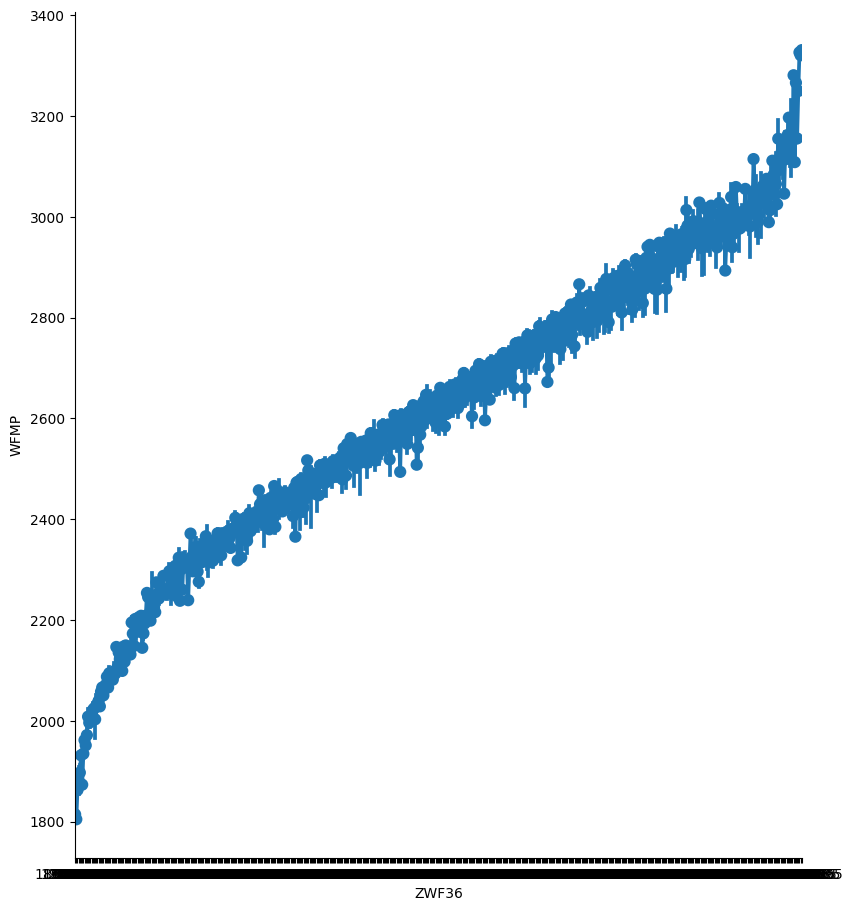

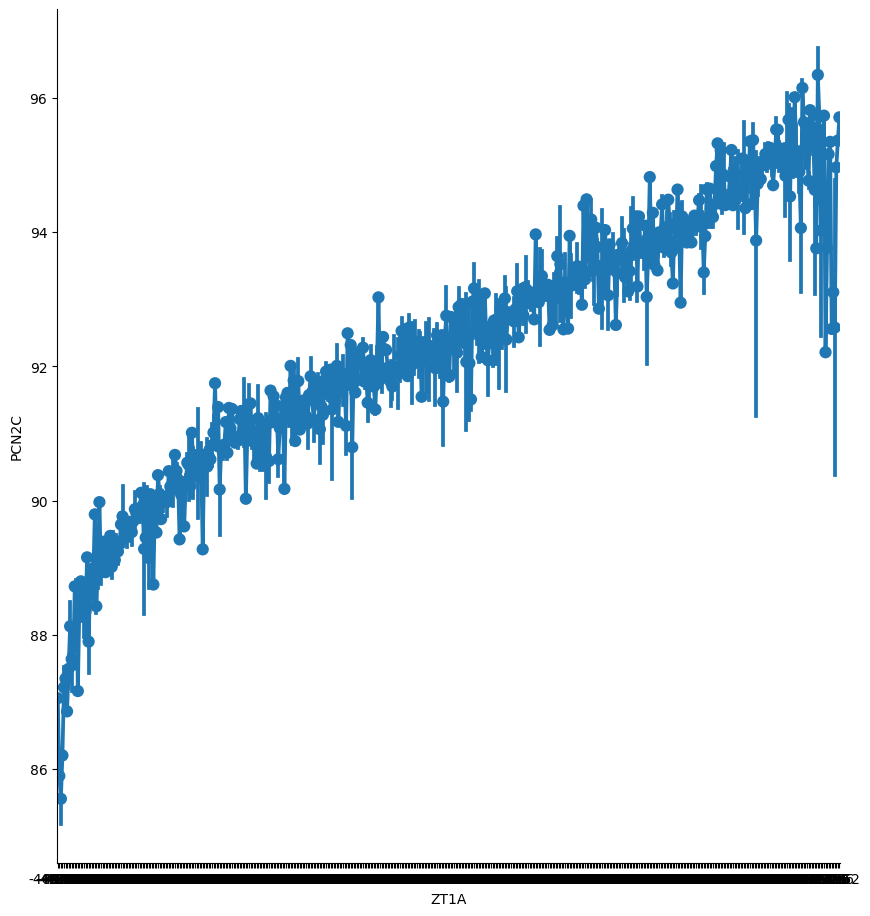

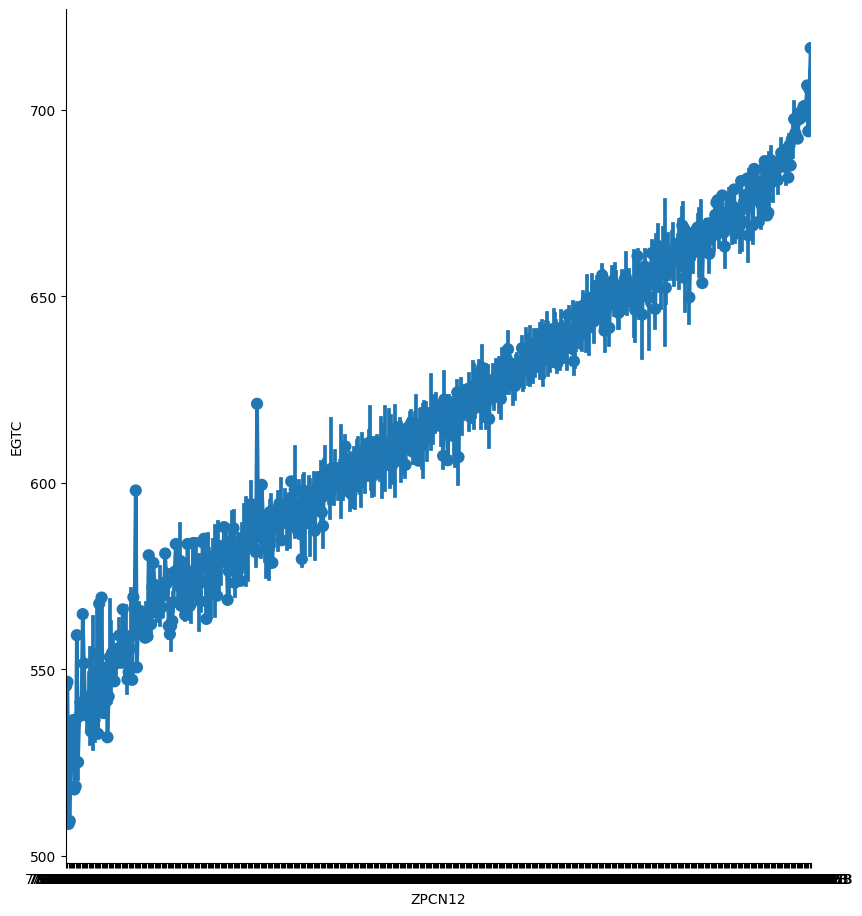

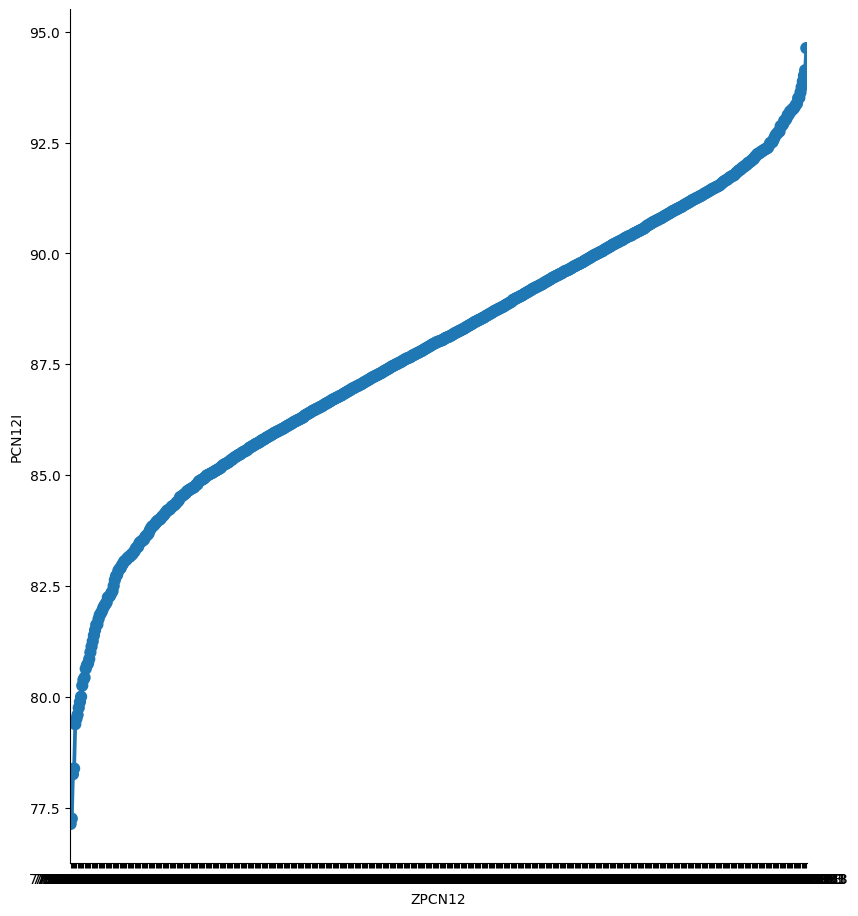

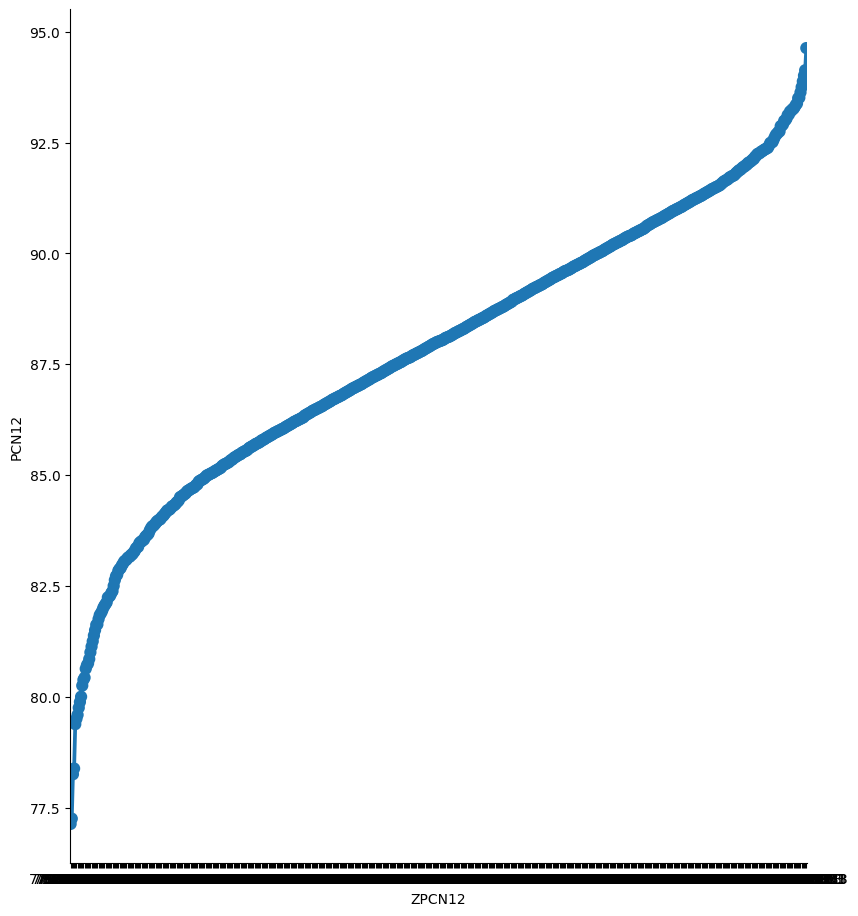

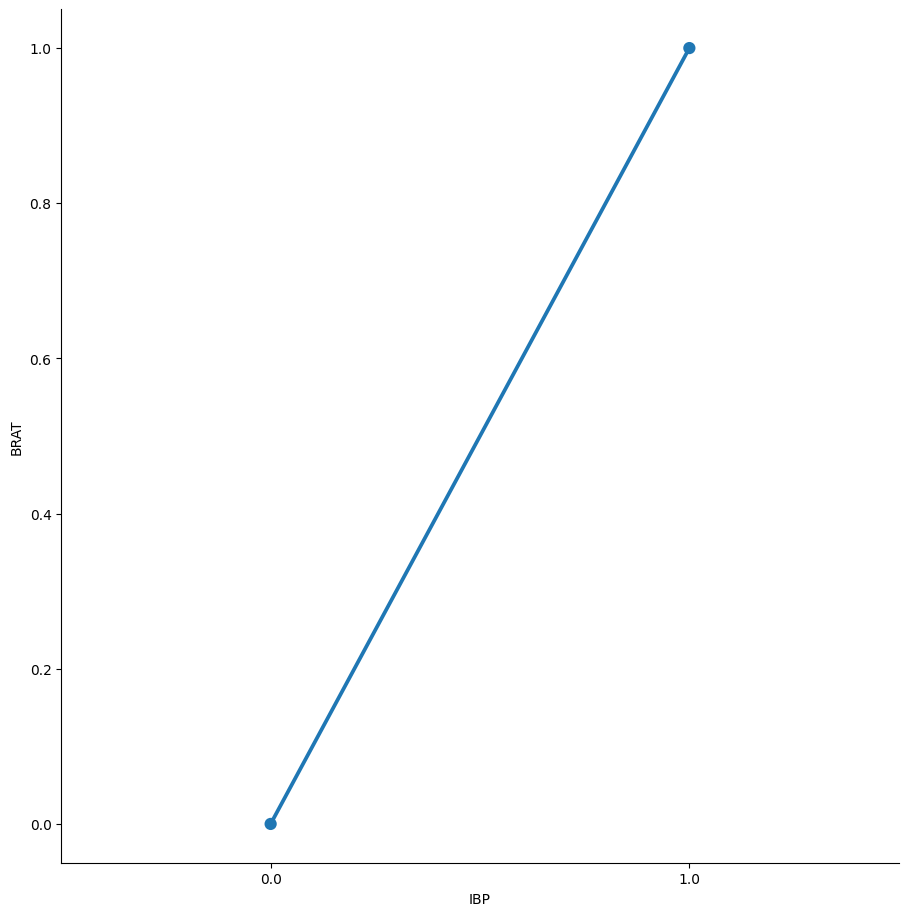

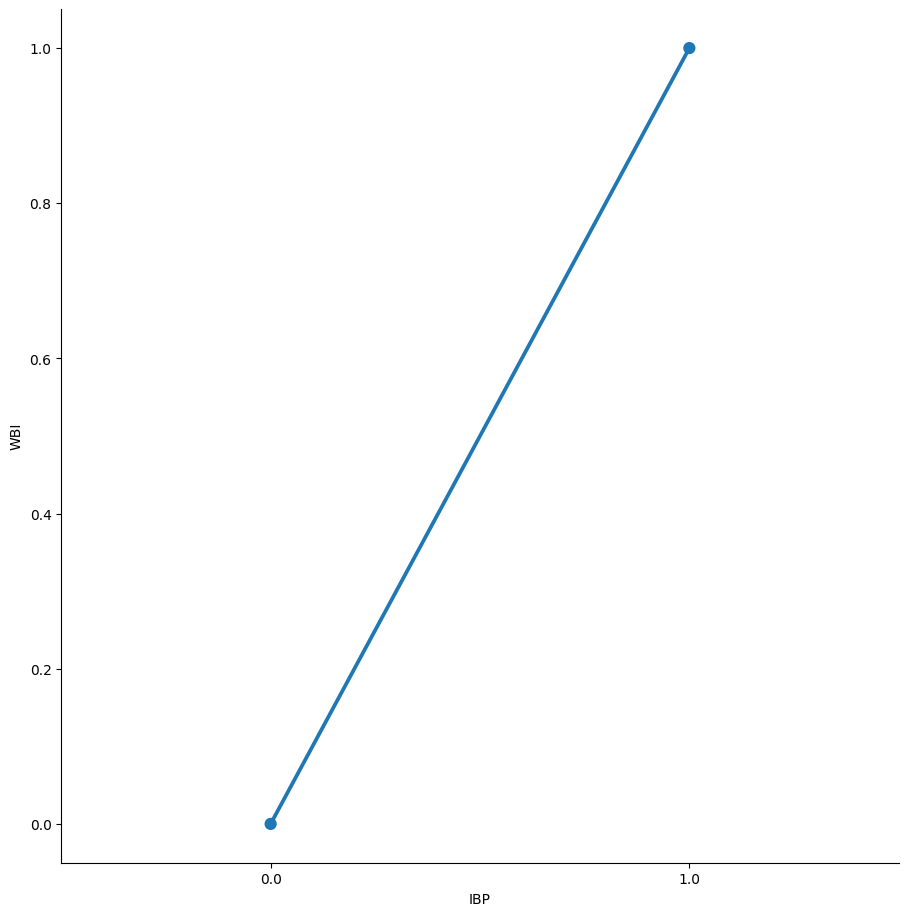

In [ ]:
plot_graphics(0.9, ("CRUISE", "CFM56-7"))

## (TAKEOFF, CFM56-7)

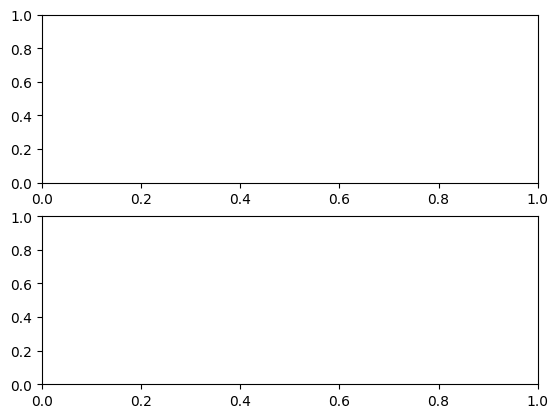

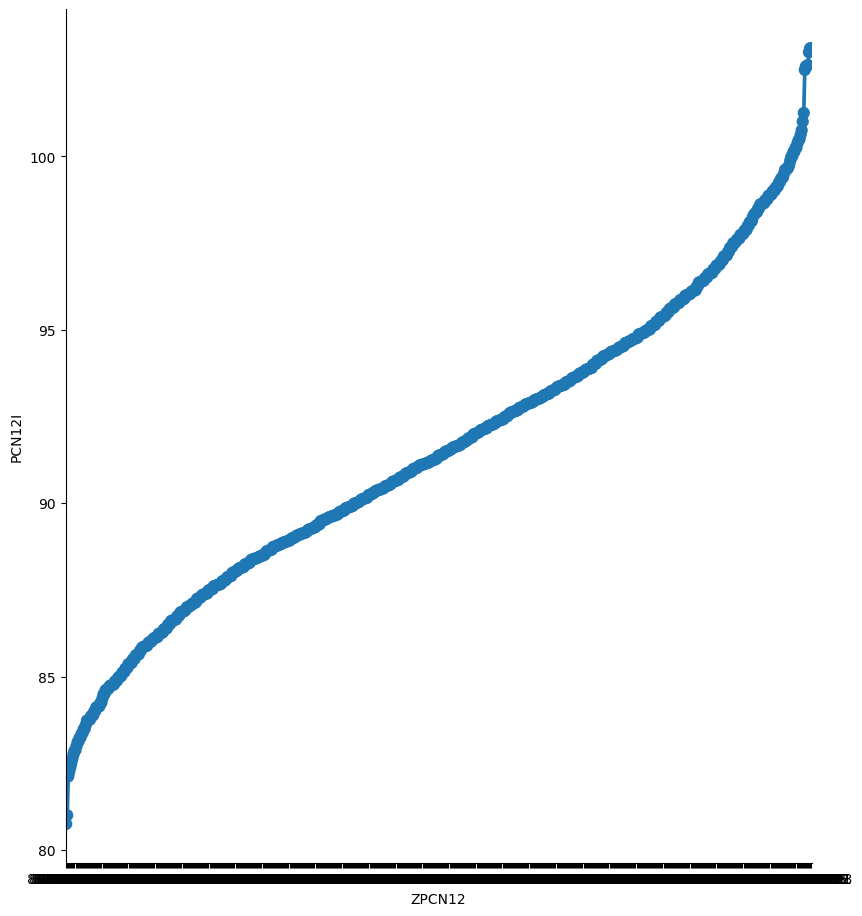

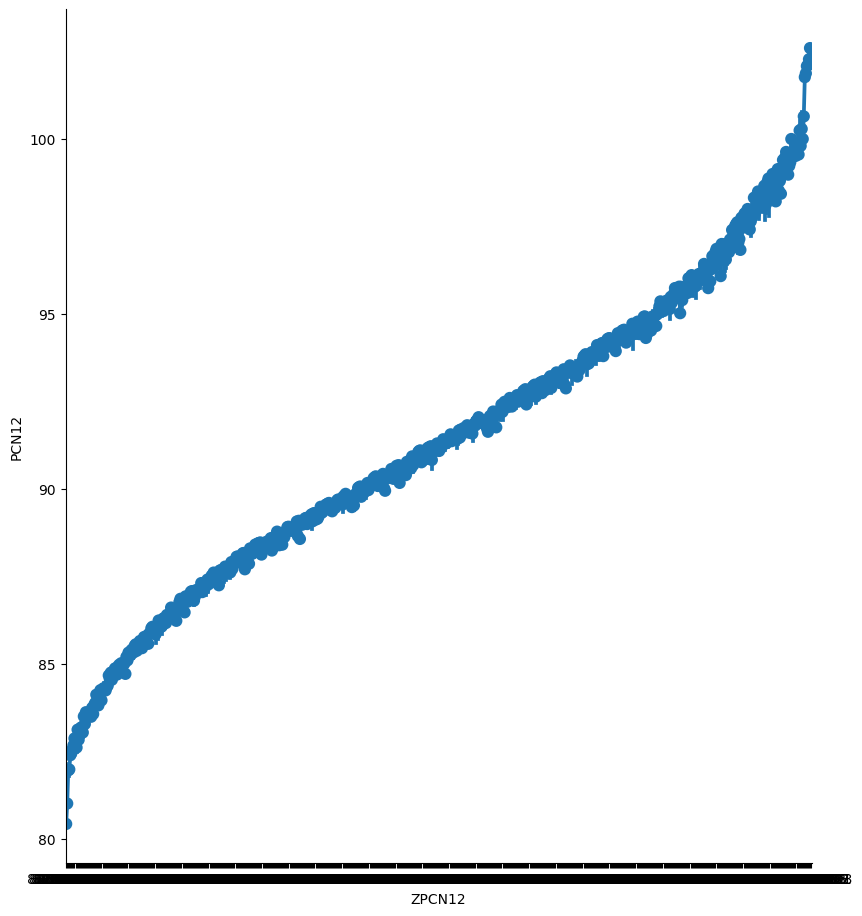

In [ ]:
plot_graphics(0.9, ("TAKEOFF", "CFM56-7"))